# Definición del problema

El problema trata de predecir que clientes responden positivamente a una oferta de seguro de automovil, de acuerdo a la información que se presenta en el data set asociado

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


In [2]:
datos_entrenamiento = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")
datos_prueba = pd.read_csv("/kaggle/input/playground-series-s4e7/test.csv")

# Analisis de datos

In [3]:
datos_entrenamiento.shape

(11504798, 12)

In [4]:
datos_prueba.shape

(7669866, 11)

Esto quiere decir que el conjunto de entrenamiento tiene 12 columnas, y cerca de 11 millones de registros, y los datos de prueba tienen 11 columnas, y cerca de 7 millones y medio de registros

In [5]:
datos_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [6]:
datos_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 643.7+ MB


La siguiente es la caracterización de cada una de las columnas:
* id: Identificación
* Gender: Genero
* Age: Año o Edad
* Driving_License: Licencia de conducción
* Region_Code: Código de región
* Previously_Insured: Aseguramiento Previo
* Vehicle_Age: Año del vehiculo
* Vehicle_Damage: Daño del vehiculo
* Annual_Premium: Suscripción anual premium
* Policy_Sales_Channel: Canal de venta de polizas
* Vintage: Antiguedad
* Response: Respuesta

Lo que se procede a realizar es una visualización de los datos, para así tener un poco más claro los mismos

In [7]:
datos_entrenamiento.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [8]:
datos_prueba.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


Lo más importante para realizar este tipo de analisis, es tener en cuenta las columnas que puedan aportar la mayor cantidad de información y eliminar aquellas columnas que no cuentan con estos requisitos, por lo tanto la columna correspondiente al id, apenas nos enumera cada uno de los registros presentes en el data set, por lo que no es relevante en este caso, por lo tanto voy a eliminar cada una de estas columnas en cada uno de los datos respectivos

In [9]:
Columnas_a_eliminar = ['id']
datos_entrenamiento = datos_entrenamiento.drop(Columnas_a_eliminar, axis=1)
datos_entrenamiento

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [10]:
Columnas_a_eliminar = ['id']
datos_prueba_1 = datos_prueba.drop(Columnas_a_eliminar, axis=1)
datos_prueba_1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...
7669861,Male,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109
7669862,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184
7669863,Male,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63
7669864,Male,30,1,28.0,0,< 1 Year,Yes,38866.0,124.0,119


Debido a que en algunas columnas se evidencia que hay datos categóricos, estos deberián ser reemplazados por números, para que así se pueda determinar la respuesta de los datos de prueba, en base a los datos de entrenamiento, así que se van a tener en cuenta cada uno de esos cambios

Antes de hacer esto vemos que en la columna vehicle_age existen datos que pueden ser diferentes a los que se pueden ver en la primera aproximación de la visualización de los mismos, pero para revisar cada uno de los datos individualmente, esto se puede tornar engorroso y poco satisfactorio, por lo tanto voy a proponer primero que todo un código que me permite verificar si hay datos diferentes a los presentes en la primera aproximación de la visualización, de ser cierta la anterior afirmación, el siguiente paso será comprobar cuáles son esos otros datos que aparecen en el archivo, pero que no podemos visualizar, pero de ser falso, entonces podemos proceder a cambiar cada una de las respectivas clasificaciones entre dos números acordes a la información suministrada

In [11]:
#Código que permite verificar si en la columna Vehicle_Age existen datos diferentes
#A los visualizados en la primera aproximación 

datos_desconocidos = set()
for datos in datos_entrenamiento['Vehicle_Age']:
    if datos != '< 1 Year' and datos != '1-2 Year':
        datos_desconocidos.add(datos)
print(datos_desconocidos)

{'> 2 Years'}


Por lo tanto podemos comprobar que el dato adicional que aparece, y no podemos visualizar es que sea mayor a 2 Years, ahora sí podemos cambiar estos datos categoricos por números, para poder utilizar está información que proporciona la columna

In [12]:
datos_entrenamiento['Gender'].replace(['Female','Male'],[0,1], inplace=True)
datos_entrenamiento['Vehicle_Age'].replace(['< 1 Year','1-2 Year','> 2 Years'],[0,1,2], inplace=True)
datos_entrenamiento['Vehicle_Damage'].replace(['No','Yes'],[0,1], inplace=True)
datos_entrenamiento.head()

/tmp/ipykernel_24/342954592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_entrenamiento['Gender'].replace(['Female','Male'],[0,1], inplace=True)
/tmp/ipykernel_24/342954592.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_entrenamiento['Gender'].replace(['Female','Male'],[0,1], 

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,0,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0


In [13]:
datos_prueba_1['Gender'].replace(['Female','Male'],[0,1], inplace=True)
datos_prueba_1['Vehicle_Age'].replace(['< 1 Year','1-2 Year','> 2 Years'],[0,1,2], inplace=True)
datos_prueba_1['Vehicle_Damage'].replace(['No','Yes'],[0,1], inplace=True)
datos_prueba_1.head()

/tmp/ipykernel_24/1143717094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_prueba_1['Gender'].replace(['Female','Male'],[0,1], inplace=True)
/tmp/ipykernel_24/1143717094.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_prueba_1['Gender'].replace(['Female','Male'],[0,1], inplace=

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,20,1,47.0,0,0,0,2630.0,160.0,228
1,1,47,1,28.0,0,1,1,37483.0,124.0,123
2,1,47,1,43.0,0,1,1,2630.0,26.0,271
3,0,22,1,47.0,1,0,0,24502.0,152.0,115
4,1,51,1,19.0,0,1,0,34115.0,124.0,148


Ahora vamos a visualizar un histograma, para poder ver la distribución que tiene cada una de las columnas:

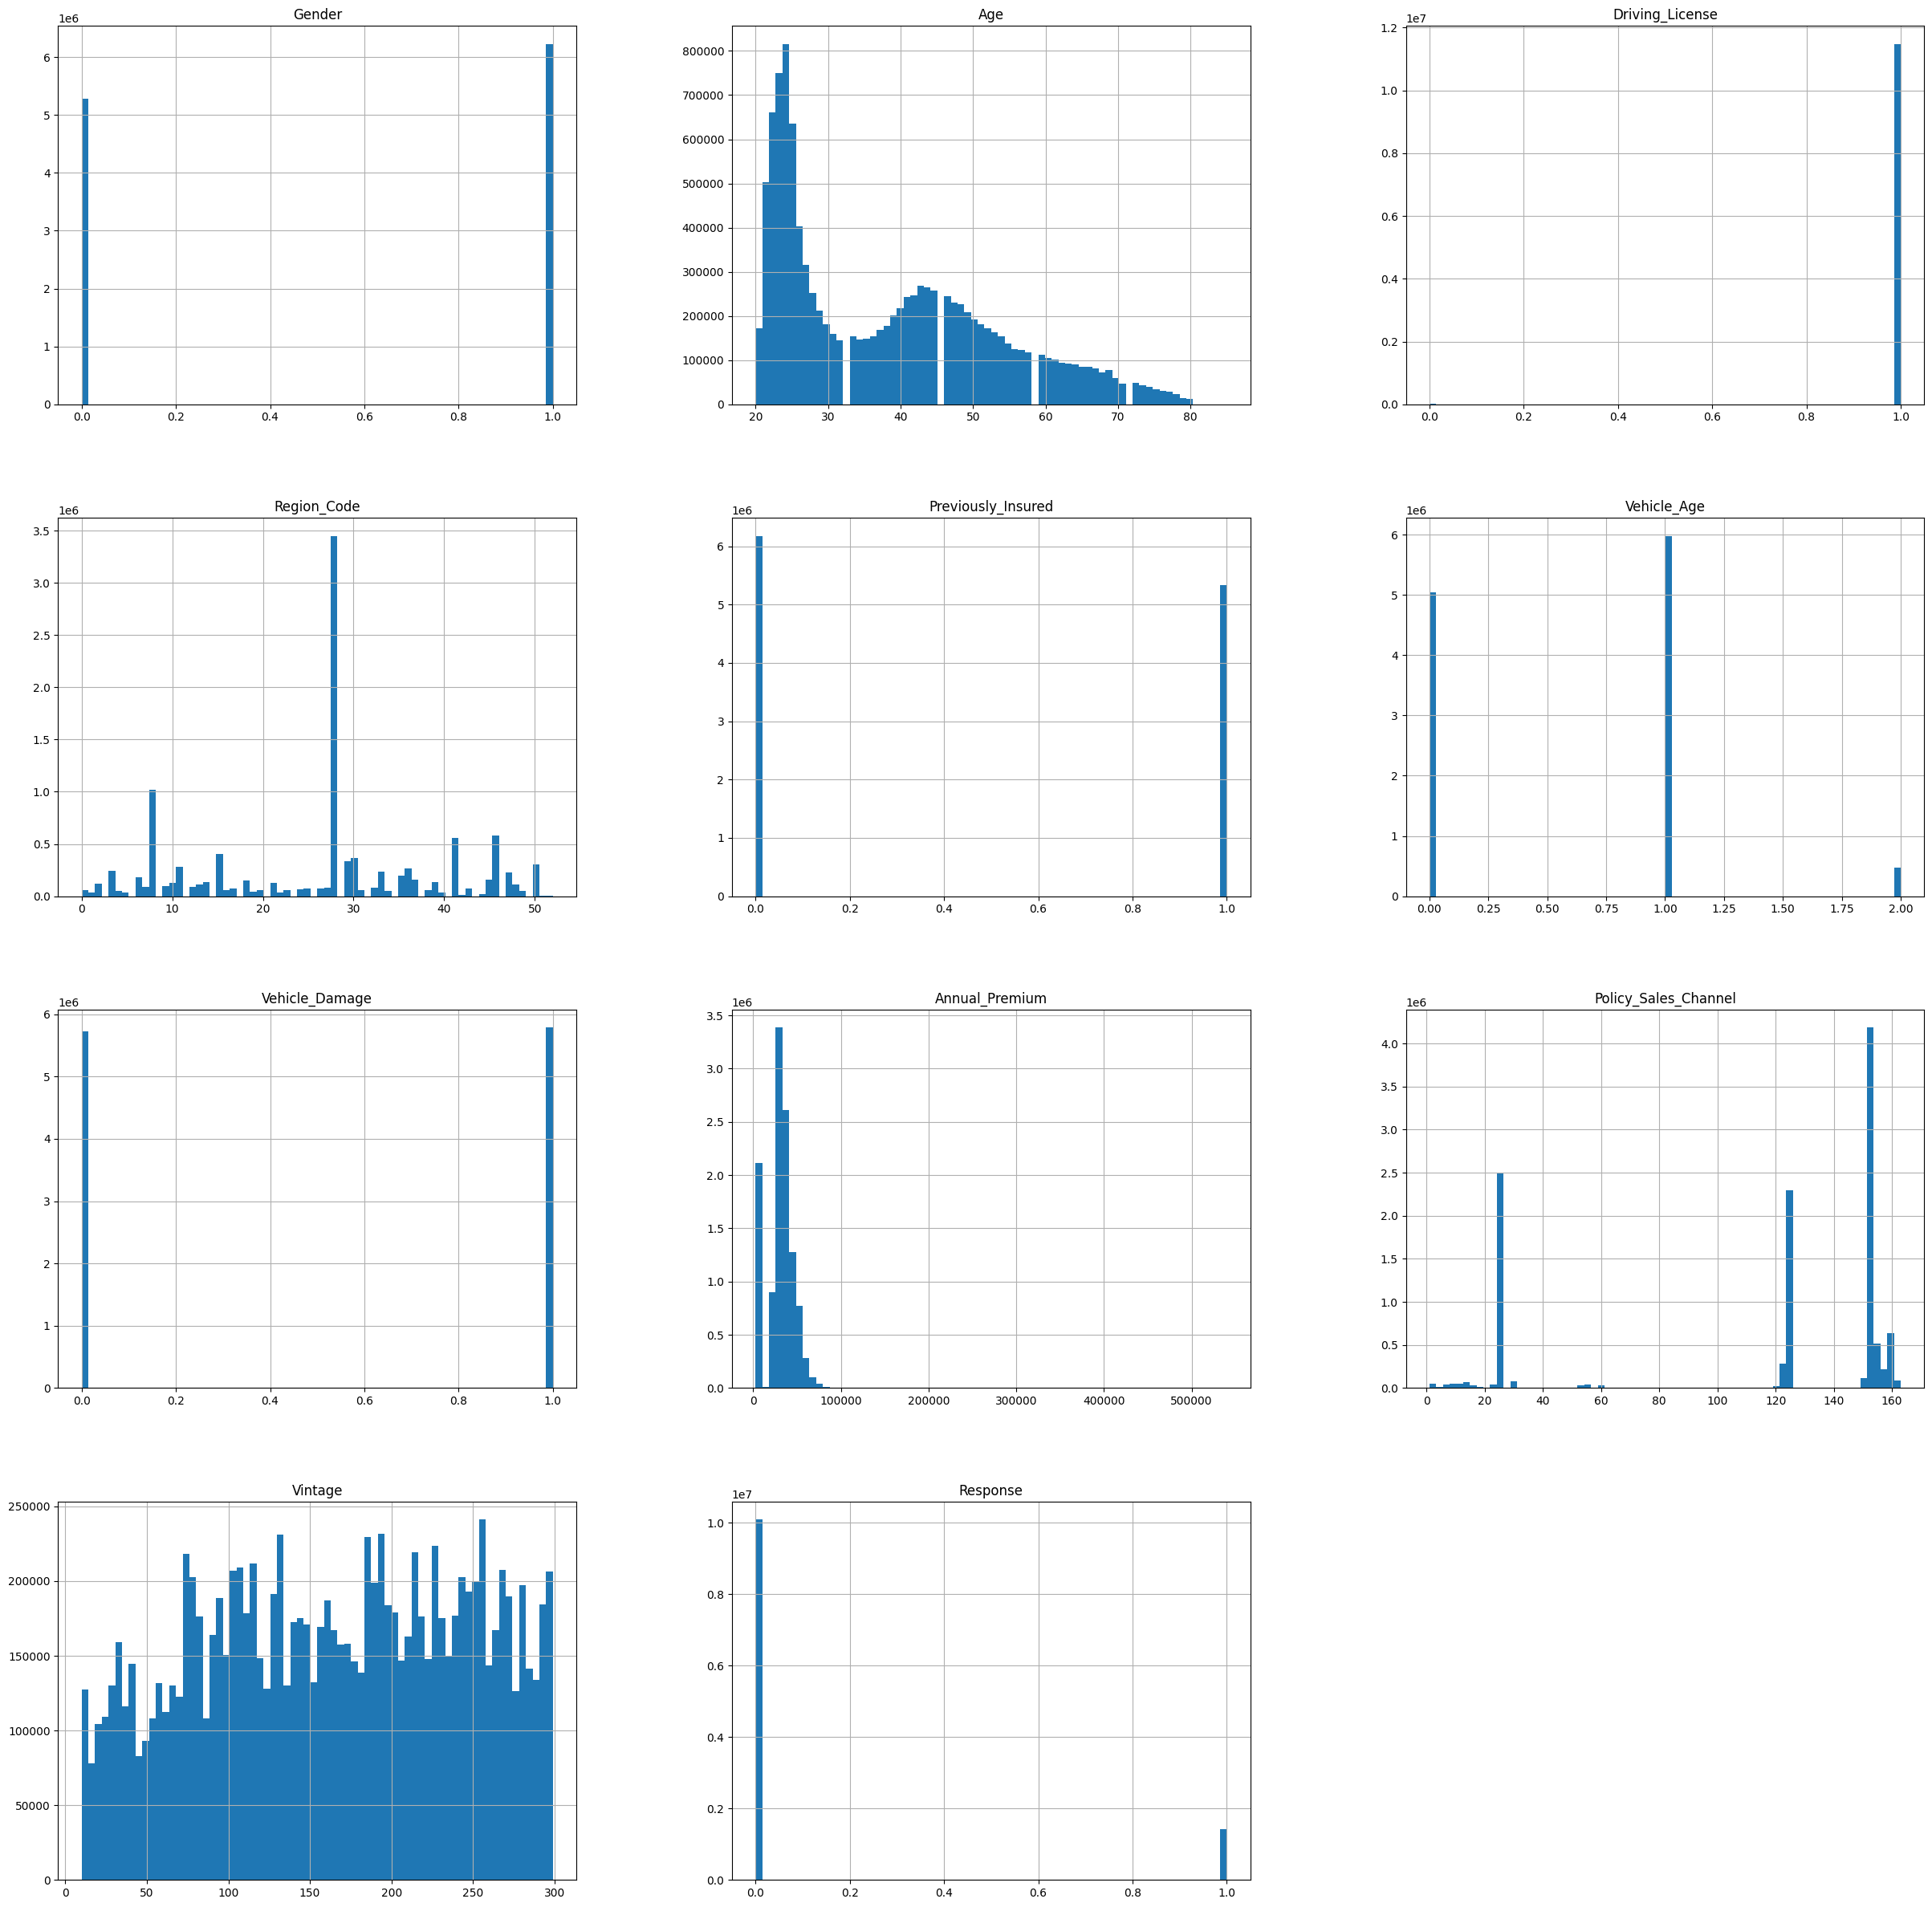

In [14]:
datos_entrenamiento.hist(bins=70, figsize=(30,30))
plt.show()

Respecto a está distribución de los datos, aparentemente, la columna _Driving_License_ No aportaría información significativa, dado que sólo tiene un dato, las demás columnas si podrian aportar información significativa a este dataset, pero sería bueno comprobar que efectivamente se tenga un sólo valor en está columna, para  evitar eliminar información que de alguna manera u otra puede ser valiosa

In [15]:
#Código que permite verificar si en la columna Vehicle_Age existen datos diferentes
#A los visualizados en la primera aproximación 

datos_desconocidos = set()
for datos in datos_entrenamiento['Driving_License']:
    if datos != 1:
        datos_desconocidos.add(datos)
print(datos_desconocidos)

{0}


Esto quiere decir que efectivamente si hay datos que tienen valor de cero, por lo tanto no es una razón suficiente para eliminar los datos

In [16]:
datos_entrenamiento.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.413510e-01,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,6.031073e-01,5.026798e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,4.982872e-01,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,5.678559e-01,4.999928e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,2.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [17]:
datos_prueba_1.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
count,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06
mean,5.412613e-01,3.839137e+01,9.980208e-01,2.642661e+01,4.630772e-01,6.033933e-01,5.025463e-01,3.046553e+04,1.123650e+02,1.638996e+02
std,4.982946e-01,1.499951e+01,4.444387e-02,1.299433e+01,4.986349e-01,5.679612e-01,4.999935e-01,1.644586e+04,5.407358e+01,7.998445e+01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01
25%,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.528000e+04,2.900000e+01,9.900000e+01
50%,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.182700e+04,1.510000e+02,1.660000e+02
75%,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.946000e+04,1.520000e+02,2.320000e+02
max,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,2.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02


## Graphics response vs another columns

En la siguiente sección se van a obtener las gráficas de barras y de pie, para así ver la relación de las respuestas positivas con cada una de las diferentes columnas y sus respectivas caracteristicas, así podemos tener una idea mucho más clara de que personas son las que tienen más probabilidad de comprar un seguro para automovil

### Gráfica dependiendo del género

Text(0.5, 1.0, 'Distribución de las respuestas si es mujer')

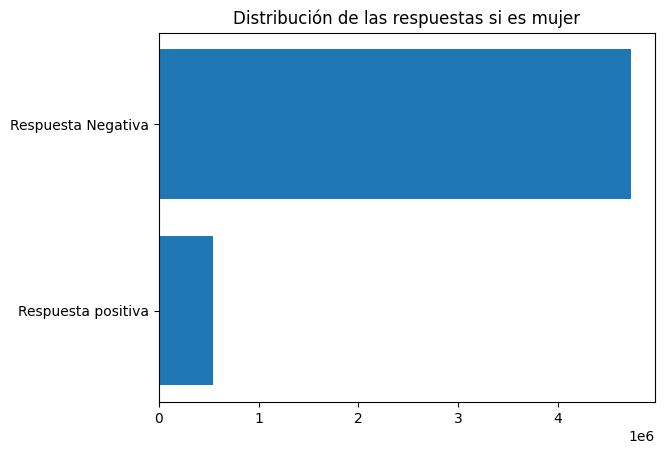

In [18]:
respuesta_positiva_mujer = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Gender==0)].count()
respuesta_negativa_mujer = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Gender==0)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_mujer,respuesta_negativa_mujer])
plt.title('Distribución de las respuestas si es mujer')

Text(0.5, 1.0, 'Distribuación de la respuesta si es mujer')

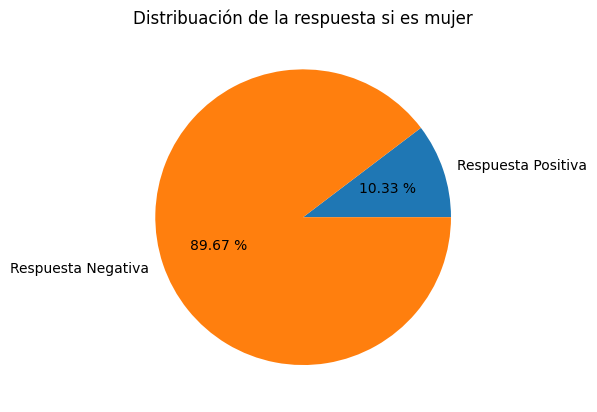

In [19]:
plt.pie([respuesta_positiva_mujer, respuesta_negativa_mujer], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si es mujer')

Text(0.5, 1.0, 'Distribución de las respuestas si es hombre')

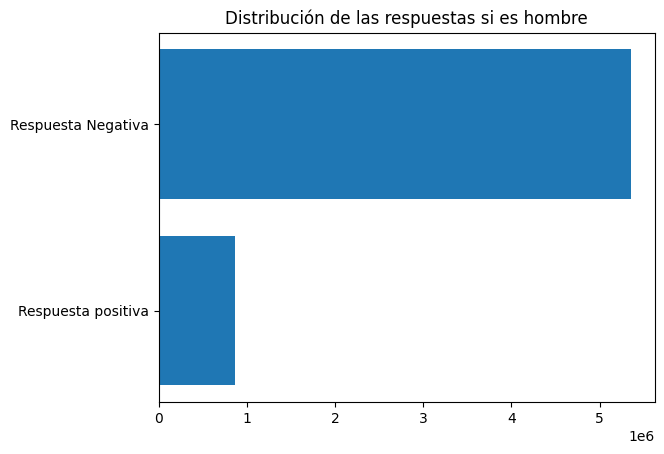

In [20]:
respuesta_positiva_hombre = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Gender==1)].count()
respuesta_negativa_hombre = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Gender==1)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_hombre,respuesta_negativa_hombre])
plt.title('Distribución de las respuestas si es hombre')

Text(0.5, 1.0, 'Distribuación de la respuesta si es hombre')

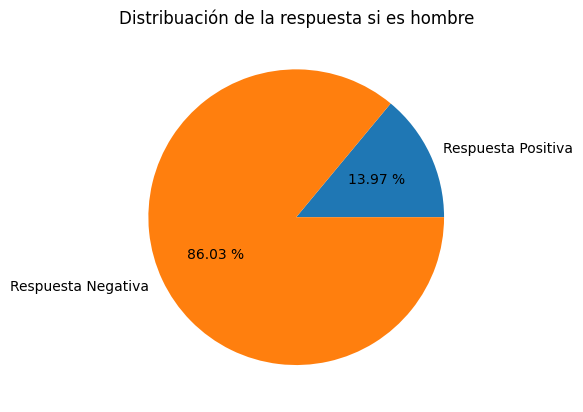

In [21]:
plt.pie([respuesta_positiva_hombre, respuesta_negativa_hombre], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si es hombre')

### Gráfica dependiendo de la edad

Text(0.5, 1.0, 'Distribución de las respuestas si es menor a 35 años')

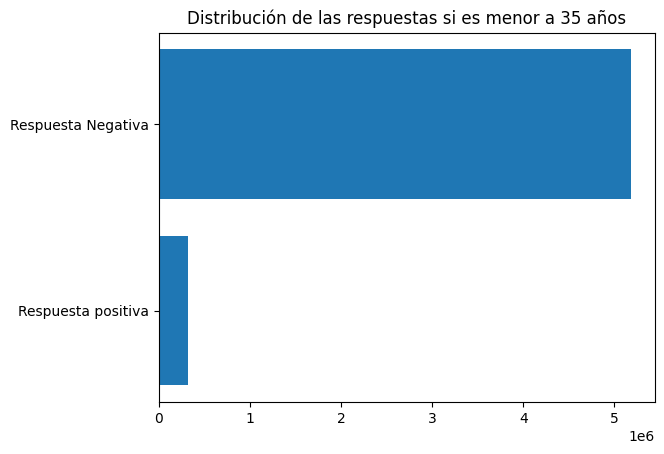

In [22]:
respuesta_positiva_persona_joven = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Age<35)].count()
respuesta_negativa_persona_joven = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Age<35)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_persona_joven,respuesta_negativa_persona_joven])
plt.title('Distribución de las respuestas si es menor a 35 años')

Text(0.5, 1.0, 'Distribuación de la respuesta si es menor a 35 años')

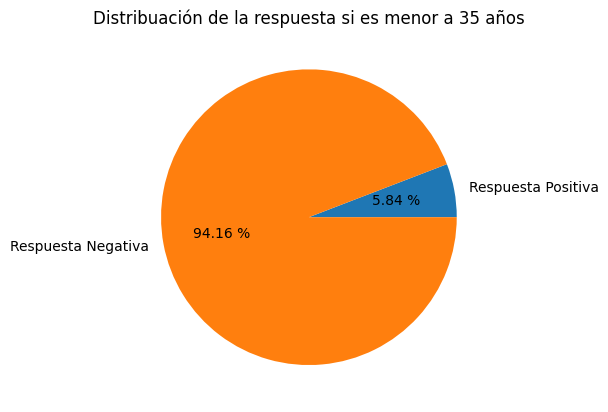

In [23]:
plt.pie([respuesta_positiva_persona_joven, respuesta_negativa_persona_joven], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si es menor a 35 años')

Text(0.5, 1.0, 'Distribución de las respuestas si la edad está entre 35 y 64 años')

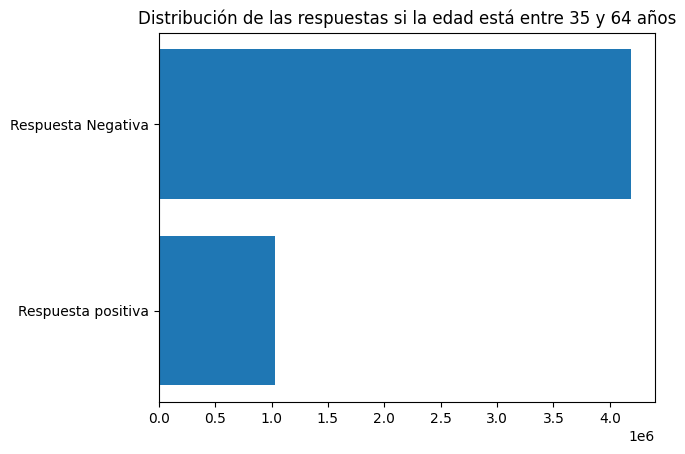

In [24]:
respuesta_positiva_persona_promedio = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Age>=35)&(datos_entrenamiento.Age<=64)].count()
respuesta_negativa_persona_promedio = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Age>=35)&(datos_entrenamiento.Age<=64)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_persona_promedio,respuesta_negativa_persona_promedio])
plt.title('Distribución de las respuestas si la edad está entre 35 y 64 años')

Text(0.5, 1.0, 'Distribuación de la respuesta si está entre 35 y 64 años')

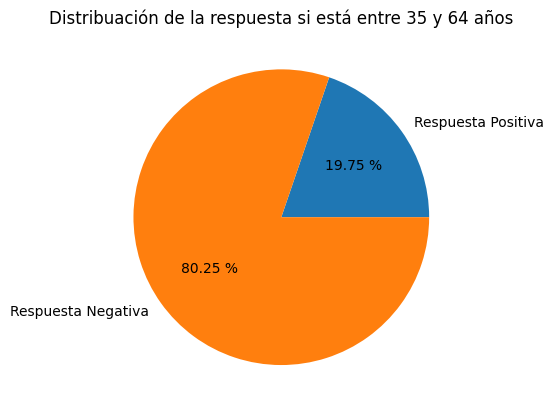

In [25]:
plt.pie([respuesta_positiva_persona_promedio, respuesta_negativa_persona_promedio], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si está entre 35 y 64 años')

Text(0.5, 1.0, 'Distribución de las respuestas si es mayor a 64 años')

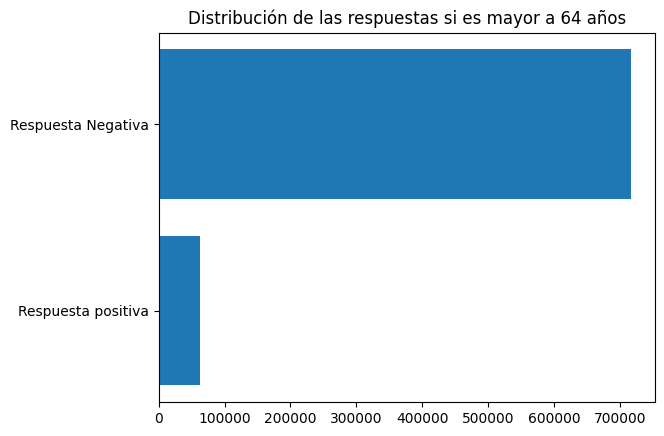

In [26]:
respuesta_positiva_tercera_edad = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Age>64)].count()
respuesta_negativa_tercera_edad = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Age>64)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_tercera_edad,respuesta_negativa_tercera_edad])
plt.title('Distribución de las respuestas si es mayor a 64 años')

Text(0.5, 1.0, 'Distribuación de la respuesta si es mayor a 64 años')

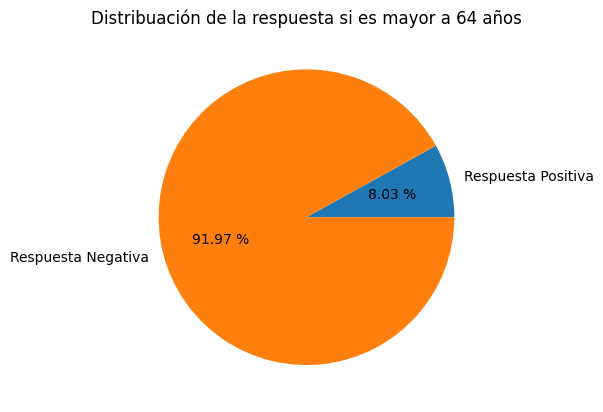

In [27]:
plt.pie([respuesta_positiva_tercera_edad, respuesta_negativa_tercera_edad], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si es mayor a 64 años')

### Gráfica dependiendo de la licencia

Text(0.5, 1.0, 'Distribución de las respuestas si no tiene licencia')

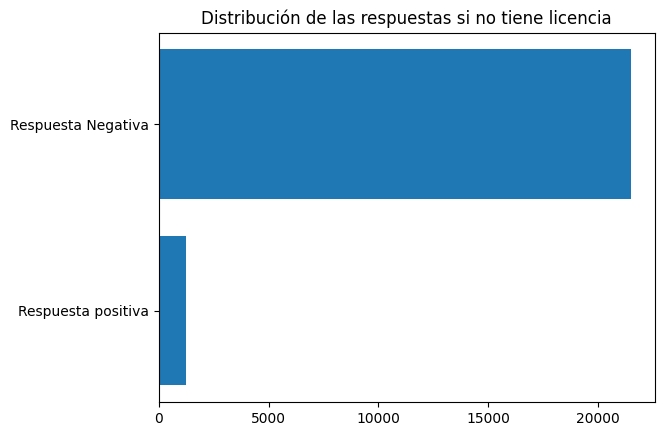

In [28]:
respuesta_positiva_sin_licencia = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Driving_License==0)].count()
respuesta_negativa_sin_licencia = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Driving_License==0)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_sin_licencia,respuesta_negativa_sin_licencia])
plt.title('Distribución de las respuestas si no tiene licencia')

Text(0.5, 1.0, 'Distribuación de la respuesta si no tiene licencia')

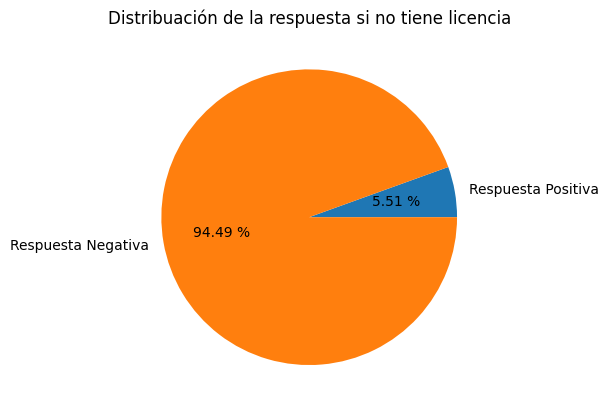

In [29]:
plt.pie([respuesta_positiva_sin_licencia, respuesta_negativa_sin_licencia], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si no tiene licencia')

Text(0.5, 1.0, 'Distribución de las respuestas si tiene licencia')

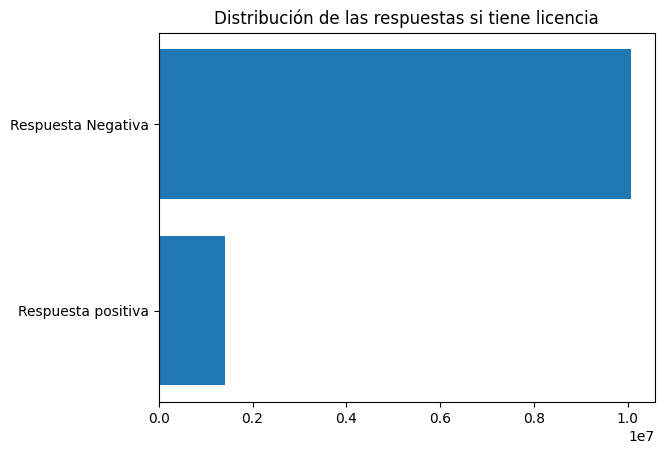

In [30]:
respuesta_positiva_con_licencia = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Driving_License==1)].count()
respuesta_negativa_con_licencia = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Driving_License==1)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_con_licencia,respuesta_negativa_con_licencia])
plt.title('Distribución de las respuestas si tiene licencia')

Text(0.5, 1.0, 'Distribuación de la respuesta si tiene licencia')

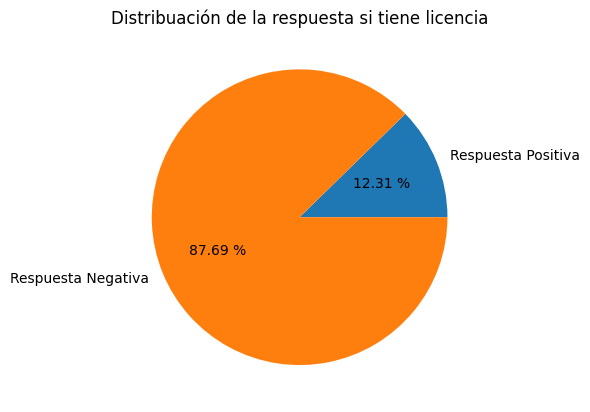

In [31]:
plt.pie([respuesta_positiva_con_licencia, respuesta_negativa_con_licencia], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si tiene licencia')

### Gráfica dependiendo de la región

Text(0.5, 1.0, 'Distribución de las respuestas si la región está comprendida entre 0 y 10')

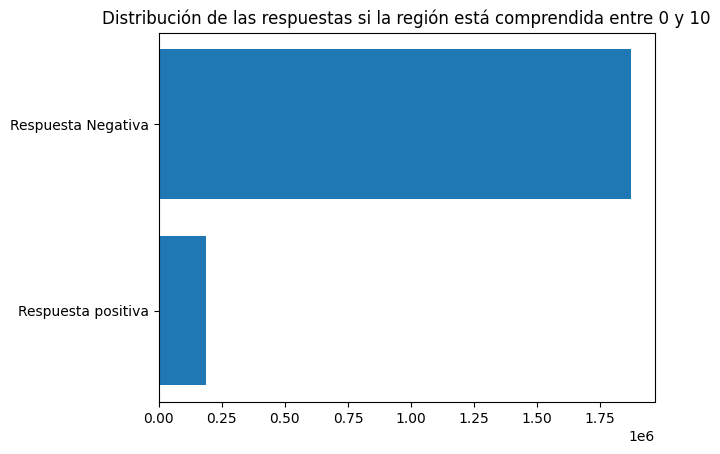

In [32]:
respuesta_positiva_region_1 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Region_Code<=10)].count()
respuesta_negativa_region_1 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Region_Code<=10)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_region_1,respuesta_negativa_region_1])
plt.title('Distribución de las respuestas si la región está comprendida entre 0 y 10')

Text(0.5, 1.0, 'Distribución de las respuestas si la región está comprendida entre 0 y 10')

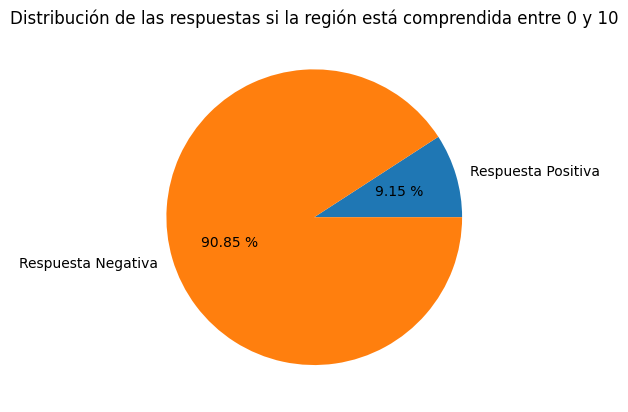

In [33]:
plt.pie([respuesta_positiva_region_1, respuesta_negativa_region_1], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas si la región está comprendida entre 0 y 10')

Text(0.5, 1.0, 'Distribución de las respuestas si la región está comprendida entre 11 y 20')

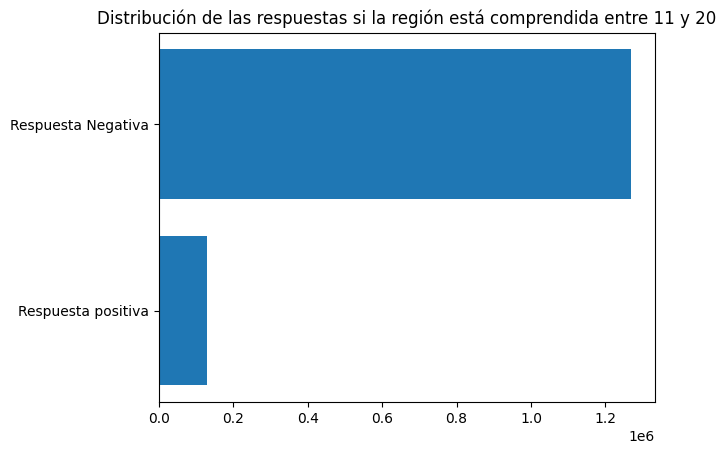

In [34]:
respuesta_positiva_region_2 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Region_Code>10)&(datos_entrenamiento.Region_Code<=20)].count()
respuesta_negativa_region_2 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Region_Code>10)&(datos_entrenamiento.Region_Code<=20)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_region_2,respuesta_negativa_region_2])
plt.title('Distribución de las respuestas si la región está comprendida entre 11 y 20')

Text(0.5, 1.0, 'Distribución de las respuestas si la región está comprendida entre 11 y 20')

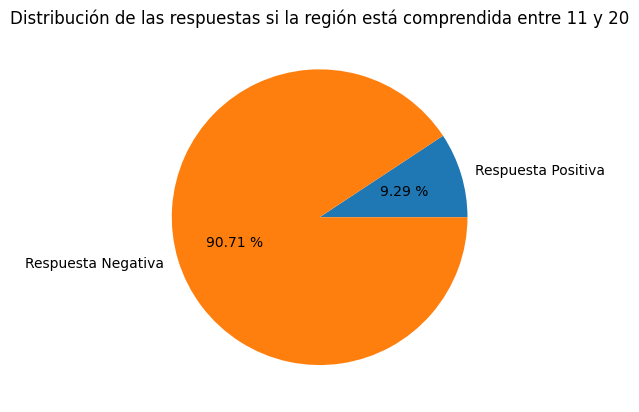

In [35]:
plt.pie([respuesta_positiva_region_2, respuesta_negativa_region_2], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas si la región está comprendida entre 11 y 20')

Text(0.5, 1.0, 'Distribución de las respuestas si la región está comprendida entre 21 y 30')

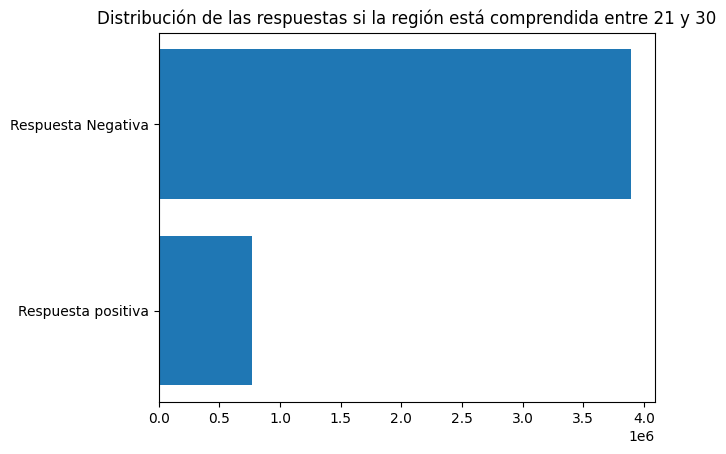

In [36]:
respuesta_positiva_region_3 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Region_Code>20)&(datos_entrenamiento.Region_Code<=30)].count()
respuesta_negativa_region_3 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Region_Code>20)&(datos_entrenamiento.Region_Code<=30)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_region_3,respuesta_negativa_region_3])
plt.title('Distribución de las respuestas si la región está comprendida entre 21 y 30')

Text(0.5, 1.0, 'Distribución de las respuestas si la región está comprendida entre 21 y 30')

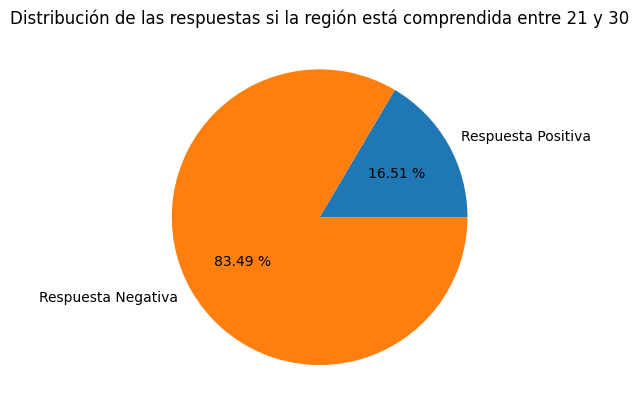

In [37]:
plt.pie([respuesta_positiva_region_3, respuesta_negativa_region_3], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas si la región está comprendida entre 21 y 30')

Text(0.5, 1.0, 'Distribución de las respuestas si la región está comprendida entre 31 y 40')

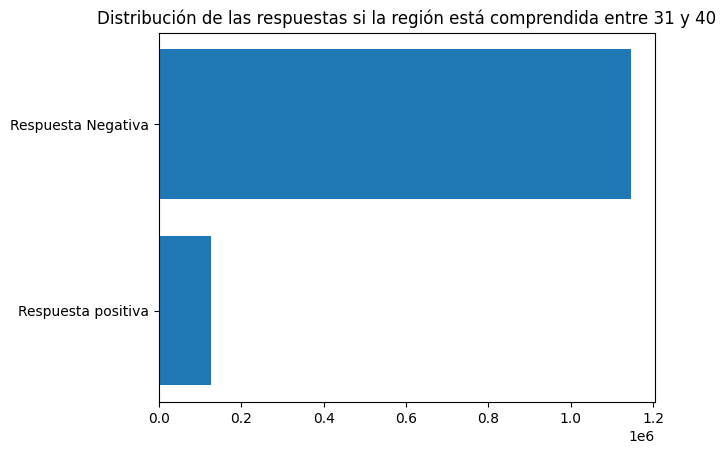

In [38]:
respuesta_positiva_region_4 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Region_Code>30)&(datos_entrenamiento.Region_Code<=40)].count()
respuesta_negativa_region_4 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Region_Code>30)&(datos_entrenamiento.Region_Code<=40)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_region_4,respuesta_negativa_region_4])
plt.title('Distribución de las respuestas si la región está comprendida entre 31 y 40')

Text(0.5, 1.0, 'Distribución de las respuestas si la región está comprendida entre 31 y 40')

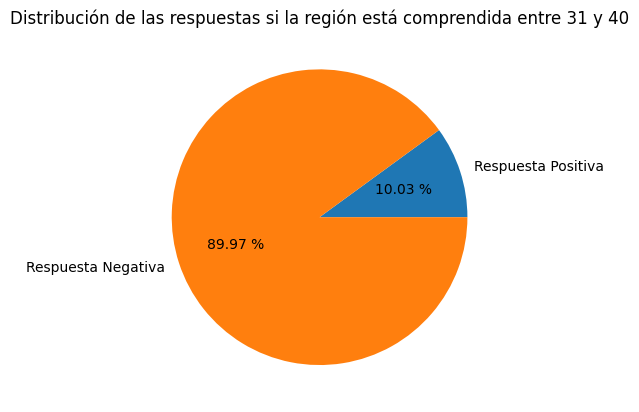

In [39]:
plt.pie([respuesta_positiva_region_4, respuesta_negativa_region_4], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas si la región está comprendida entre 31 y 40')

Text(0.5, 1.0, 'Distribución de las respuestas si la región está comprendida entre 41 y 50')

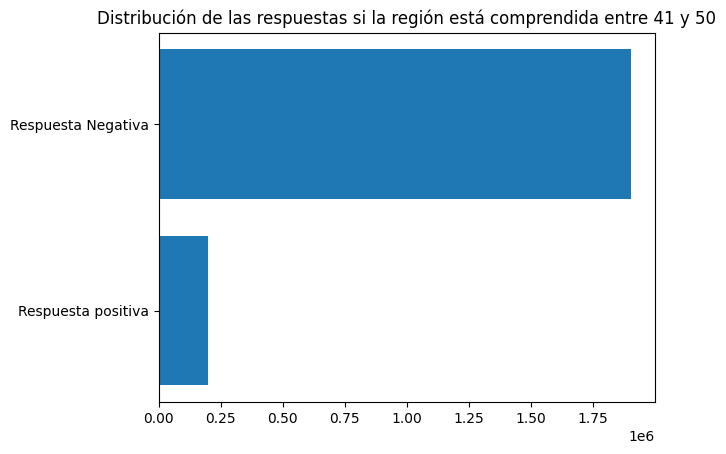

In [40]:
respuesta_positiva_region_5 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Region_Code>40)&(datos_entrenamiento.Region_Code<=50)].count()
respuesta_negativa_region_5 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Region_Code>40)&(datos_entrenamiento.Region_Code<=50)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_region_5,respuesta_negativa_region_5])
plt.title('Distribución de las respuestas si la región está comprendida entre 41 y 50')

Text(0.5, 1.0, 'Distribución de las respuestas si la región está comprendida entre 41 y 50')

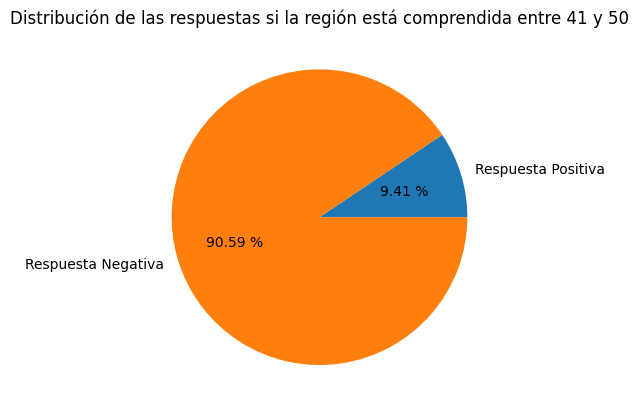

In [41]:
plt.pie([respuesta_positiva_region_5, respuesta_negativa_region_5], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas si la región está comprendida entre 41 y 50')

### Gráfica dependiendo del aseguramiento previo

Text(0.5, 1.0, 'Distribución de las respuestas sin aseguramiento previo')

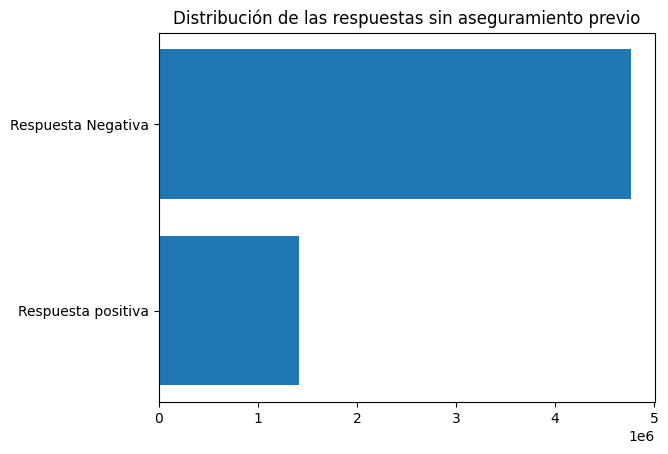

In [42]:
respuesta_positiva_sin_aseguramiento = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Previously_Insured==0)].count()
respuesta_negativa_sin_aseguramiento = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Previously_Insured==0)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_sin_aseguramiento,respuesta_negativa_sin_aseguramiento])
plt.title('Distribución de las respuestas sin aseguramiento previo')

Text(0.5, 1.0, 'Distribuación de la respuesta sin aseguramiento')

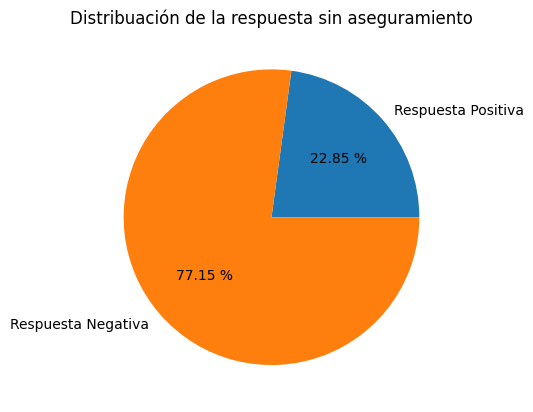

In [43]:
plt.pie([respuesta_positiva_sin_aseguramiento, respuesta_negativa_sin_aseguramiento], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta sin aseguramiento')

Text(0.5, 1.0, 'Distribución de las respuestas con aseguramiento previo')

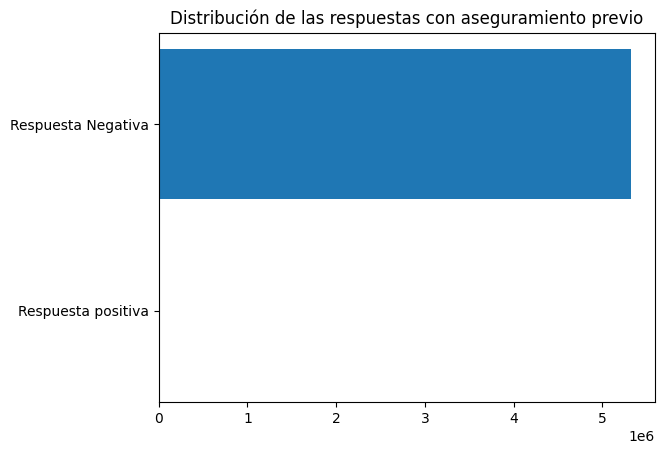

In [44]:
respuesta_positiva_con_aseguramiento = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Previously_Insured==1)].count()
respuesta_negativa_con_aseguramiento = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Previously_Insured==1)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_con_aseguramiento,respuesta_negativa_con_aseguramiento])
plt.title('Distribución de las respuestas con aseguramiento previo')

Text(0.5, 1.0, 'Distribuación de la respuesta con aseguramiento')

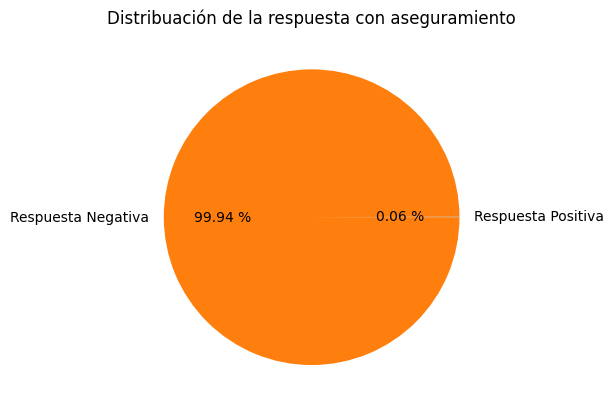

In [45]:
plt.pie([respuesta_positiva_con_aseguramiento, respuesta_negativa_con_aseguramiento], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta con aseguramiento')

### Gráfica dependiendo del año del vehiculo

Text(0.5, 1.0, 'Distribución de las respuestas si el vehiculo es cero')

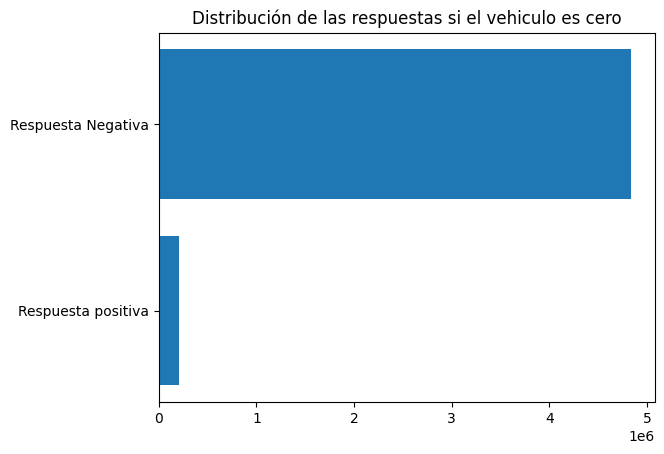

In [46]:
respuesta_positiva_vehiculo_0 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Vehicle_Age==0)].count()
respuesta_negativa_vehiculo_0 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Vehicle_Age==0)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_vehiculo_0,respuesta_negativa_vehiculo_0])
plt.title('Distribución de las respuestas si el vehiculo es cero')

Text(0.5, 1.0, 'Distribuación de la respuesta si tiene licencia')

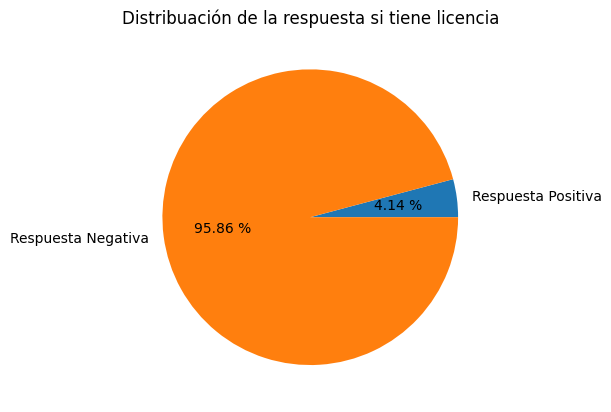

In [47]:
plt.pie([respuesta_positiva_vehiculo_0, respuesta_negativa_vehiculo_0], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si tiene licencia')

Text(0.5, 1.0, 'Distribución de las respuestas si el vehiculo es uno')

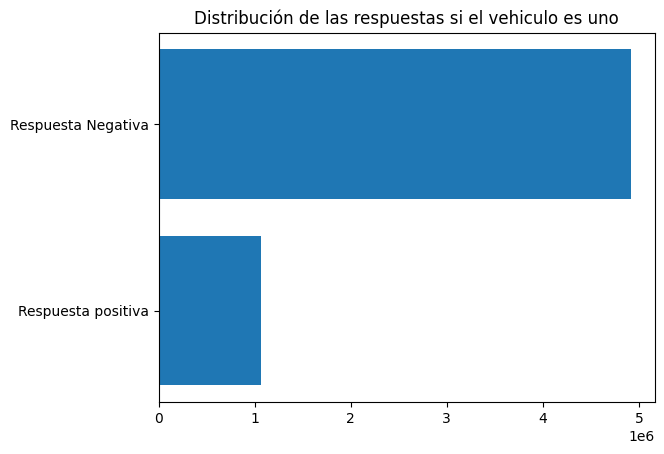

In [48]:
respuesta_positiva_vehiculo_1 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Vehicle_Age==1)].count()
respuesta_negativa_vehiculo_1 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Vehicle_Age==1)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_vehiculo_1,respuesta_negativa_vehiculo_1])
plt.title('Distribución de las respuestas si el vehiculo es uno')

Text(0.5, 1.0, 'Distribuación de la respuesta si tiene licencia')

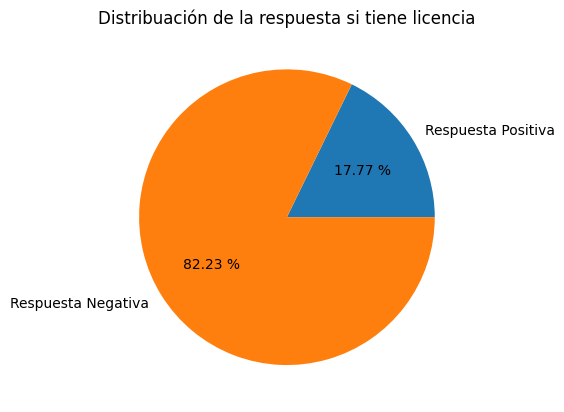

In [49]:
plt.pie([respuesta_positiva_vehiculo_1, respuesta_negativa_vehiculo_1], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si tiene licencia')

Text(0.5, 1.0, 'Distribución de las respuestas si el vehiculo es dos')

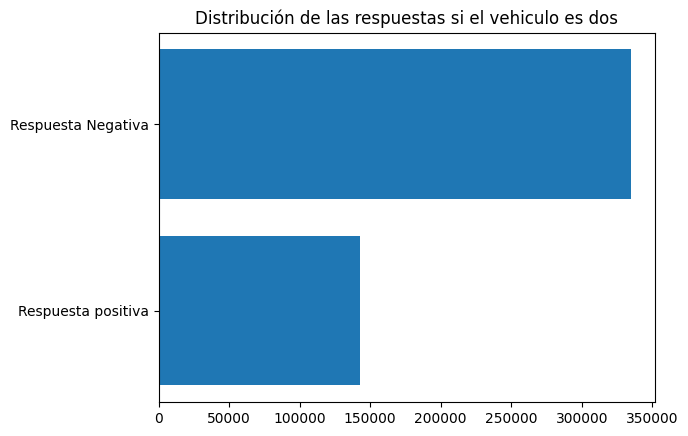

In [50]:
respuesta_positiva_vehiculo_2 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Vehicle_Age==2)].count()
respuesta_negativa_vehiculo_2 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Vehicle_Age==2)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_vehiculo_2,respuesta_negativa_vehiculo_2])
plt.title('Distribución de las respuestas si el vehiculo es dos')

Text(0.5, 1.0, 'Distribuación de la respuesta si tiene licencia')

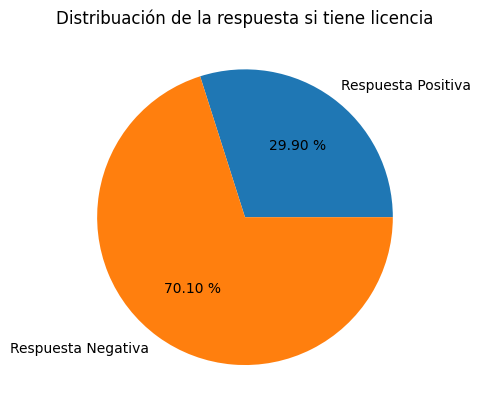

In [51]:
plt.pie([respuesta_positiva_vehiculo_2, respuesta_negativa_vehiculo_2], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si tiene licencia')

#### Gráfica dependiendo del daño del vehiculo

Text(0.5, 1.0, 'Distribución de las respuestas si el vehiculo está bueno')

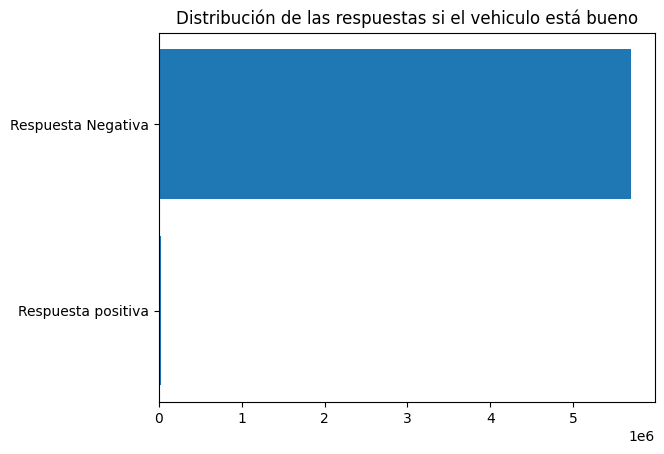

In [52]:
respuesta_positiva_vehiculo_bueno = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Vehicle_Damage==0)].count()
respuesta_negativa_vehiculo_bueno = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Vehicle_Damage==0)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_vehiculo_bueno,respuesta_negativa_vehiculo_bueno])
plt.title('Distribución de las respuestas si el vehiculo está bueno')

Text(0.5, 1.0, 'Distribuación de la respuesta si el vehiculo está bueno')

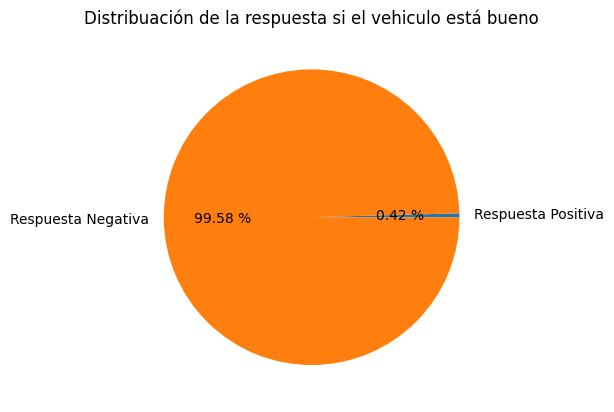

In [53]:
plt.pie([respuesta_positiva_vehiculo_bueno, respuesta_negativa_vehiculo_bueno], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si el vehiculo está bueno')

Text(0.5, 1.0, 'Distribución de las respuestas si el vehiculo está dañado')

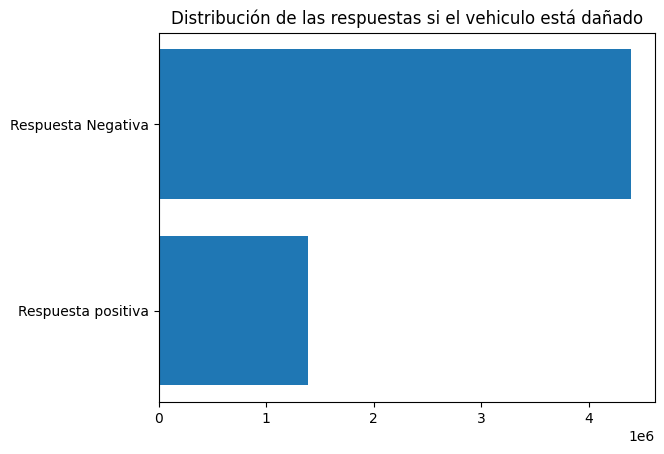

In [54]:
respuesta_positiva_vehiculo_malo = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Vehicle_Damage==1)].count()
respuesta_negativa_vehiculo_malo = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Vehicle_Damage==1)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_vehiculo_malo,respuesta_negativa_vehiculo_malo])
plt.title('Distribución de las respuestas si el vehiculo está dañado')

Text(0.5, 1.0, 'Distribuación de la respuesta si el vehiculo está dañado')

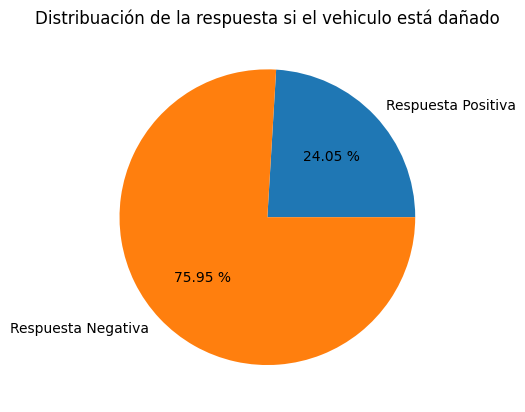

In [55]:
plt.pie([respuesta_positiva_vehiculo_malo, respuesta_negativa_vehiculo_malo], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuesta si el vehiculo está dañado')

#### Gráfica dependiendo de la suscripción anual

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la suscripción anual inferior a 25000')

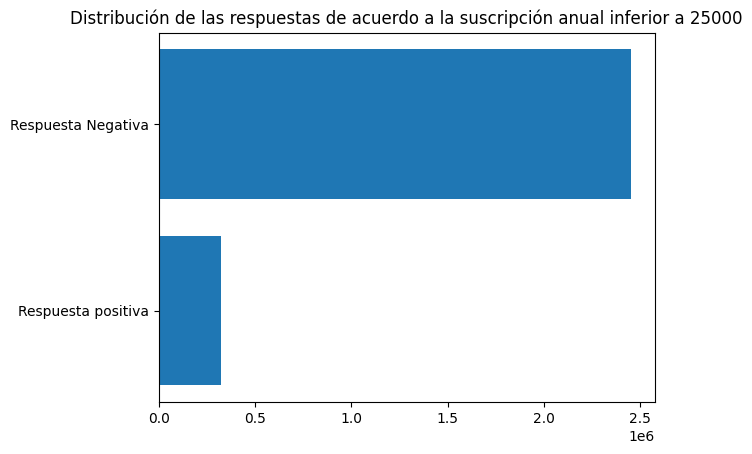

In [56]:
respuesta_positiva_suscripcion_25 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Annual_Premium<=25000)].count()
respuesta_negativa_suscripcion_25 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Annual_Premium<=25000)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_suscripcion_25,respuesta_negativa_suscripcion_25])
plt.title('Distribución de las respuestas de acuerdo a la suscripción anual inferior a 25000')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la suscripción anual inferior a 25000')

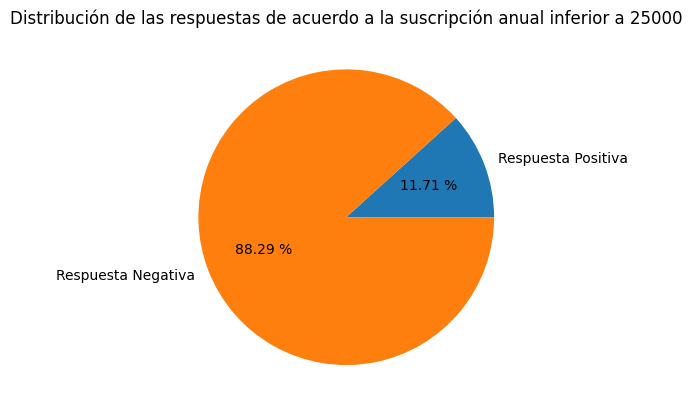

In [57]:
plt.pie([respuesta_positiva_suscripcion_25, respuesta_negativa_suscripcion_25], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la suscripción anual inferior a 25000')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la suscripción anual entre 25000 y 50000')

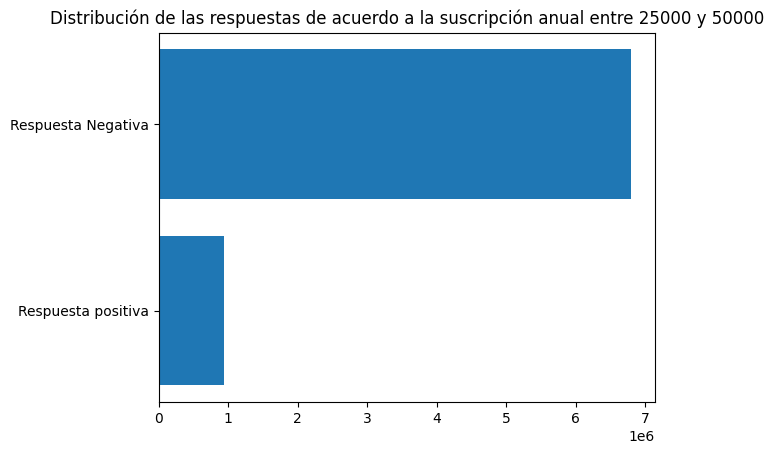

In [58]:
respuesta_positiva_suscripcion_50 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Annual_Premium>25000)&(datos_entrenamiento.Annual_Premium<=50000)].count()
respuesta_negativa_suscripcion_50 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Annual_Premium>25000)&(datos_entrenamiento.Annual_Premium<=50000)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_suscripcion_50,respuesta_negativa_suscripcion_50])
plt.title('Distribución de las respuestas de acuerdo a la suscripción anual entre 25000 y 50000')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la suscripción anual entre 25000 y 50000')

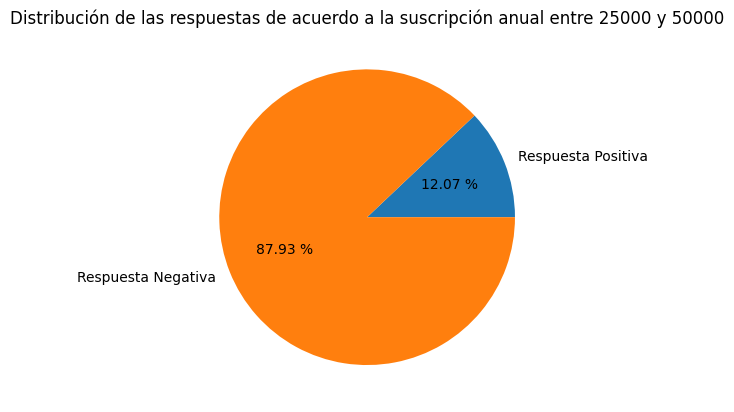

In [59]:
plt.pie([respuesta_positiva_suscripcion_50, respuesta_negativa_suscripcion_50], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la suscripción anual entre 25000 y 50000')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la suscripción anual entre 50000 y 75000')

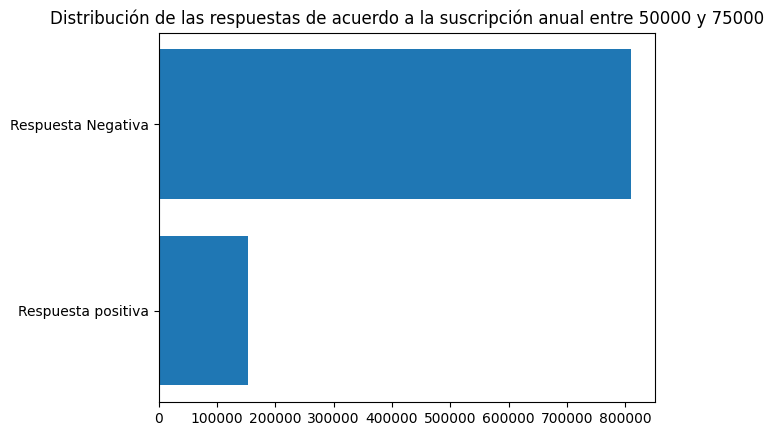

In [60]:
respuesta_positiva_suscripcion_75 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Annual_Premium>50000)&(datos_entrenamiento.Annual_Premium<=75000)].count()
respuesta_negativa_suscripcion_75 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Annual_Premium>50000)&(datos_entrenamiento.Annual_Premium<=75000)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_suscripcion_75,respuesta_negativa_suscripcion_75])
plt.title('Distribución de las respuestas de acuerdo a la suscripción anual entre 50000 y 75000')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la suscripción anual entre 50000 y 75000')

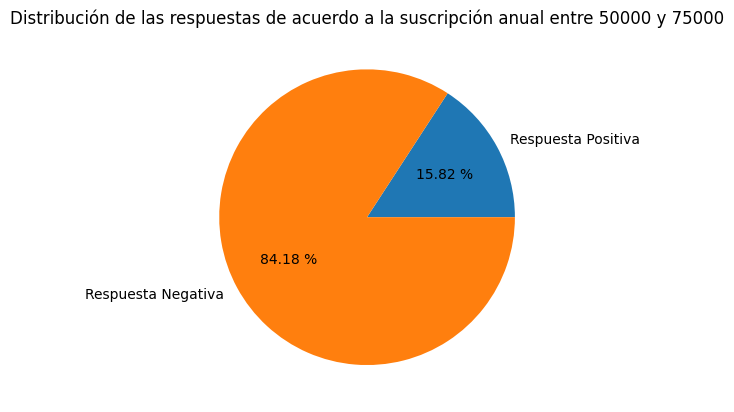

In [61]:
plt.pie([respuesta_positiva_suscripcion_75, respuesta_negativa_suscripcion_75], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la suscripción anual entre 50000 y 75000')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la suscripción anual mayor a 75000')

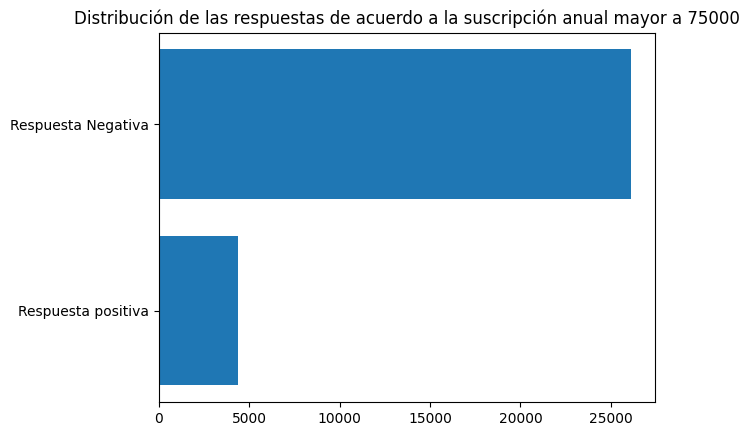

In [62]:
respuesta_positiva_suscripcion_100 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Annual_Premium>75000)].count()
respuesta_negativa_suscripcion_100 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Annual_Premium>75000)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_suscripcion_100,respuesta_negativa_suscripcion_100])
plt.title('Distribución de las respuestas de acuerdo a la suscripción anual mayor a 75000')

Text(0.5, 1.0, 'Distribuación de la respuestas de acuerdo a la suscripción anual mayor a 75000')

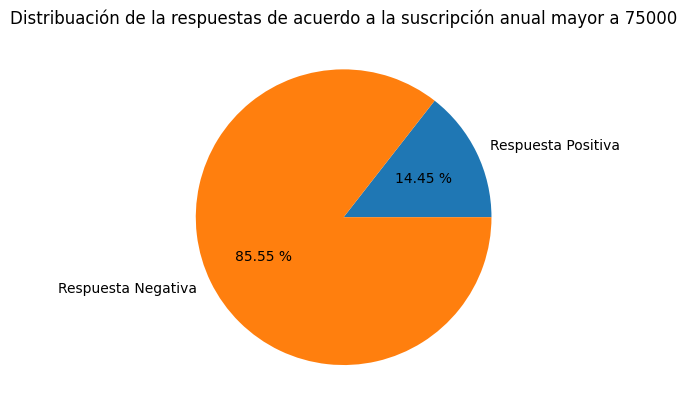

In [63]:
plt.pie([respuesta_positiva_suscripcion_100, respuesta_negativa_suscripcion_100], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribuación de la respuestas de acuerdo a la suscripción anual mayor a 75000')

#### Gráfica dependiendo del canal de politica de ventas

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la politica del canal de ventas menor a 50')

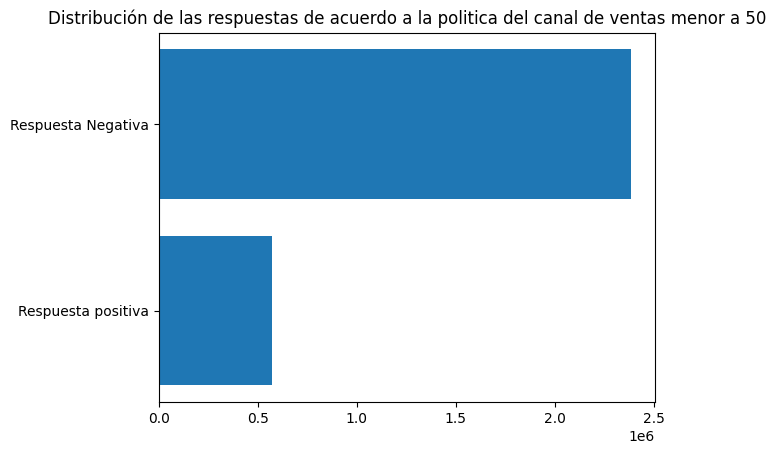

In [64]:
respuesta_positiva_canal_ventas_50 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Policy_Sales_Channel<=50)].count()
respuesta_negativa_canal_ventas_50 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Policy_Sales_Channel<=50)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_canal_ventas_50,respuesta_negativa_canal_ventas_50])
plt.title('Distribución de las respuestas de acuerdo a la politica del canal de ventas menor a 50')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la politica del canal de ventas menor a 50')

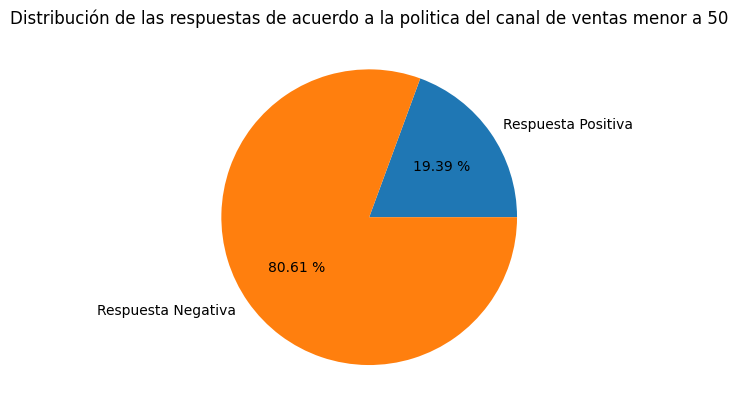

In [65]:
plt.pie([respuesta_positiva_canal_ventas_50, respuesta_negativa_canal_ventas_50], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la politica del canal de ventas menor a 50')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la politica del canal de ventas entre 50 y 100')

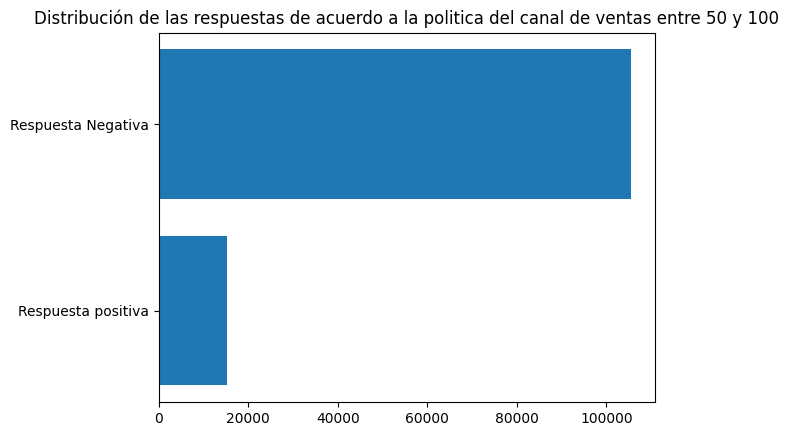

In [66]:
respuesta_positiva_canal_ventas_100 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Policy_Sales_Channel>50)&(datos_entrenamiento.Policy_Sales_Channel<=100)].count()
respuesta_negativa_canal_ventas_100 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Policy_Sales_Channel>50)&(datos_entrenamiento.Policy_Sales_Channel<=100)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_canal_ventas_100,respuesta_negativa_canal_ventas_100])
plt.title('Distribución de las respuestas de acuerdo a la politica del canal de ventas entre 50 y 100')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la politica del canal de ventas entre 50 y 100')

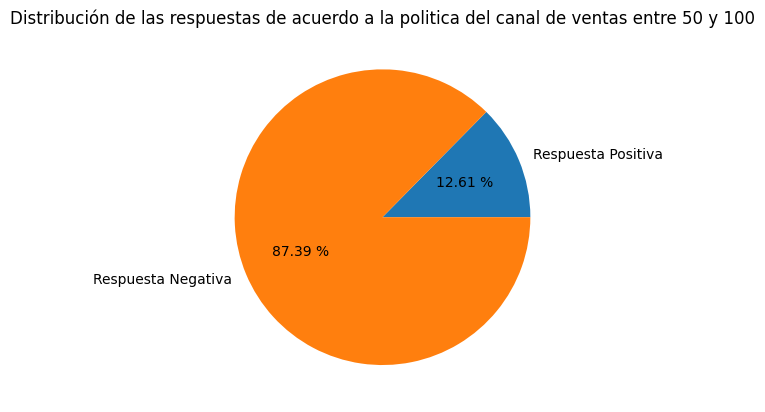

In [67]:
plt.pie([respuesta_positiva_canal_ventas_100, respuesta_negativa_canal_ventas_100], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la politica del canal de ventas entre 50 y 100')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la politica del canal de ventas mayor a 100')

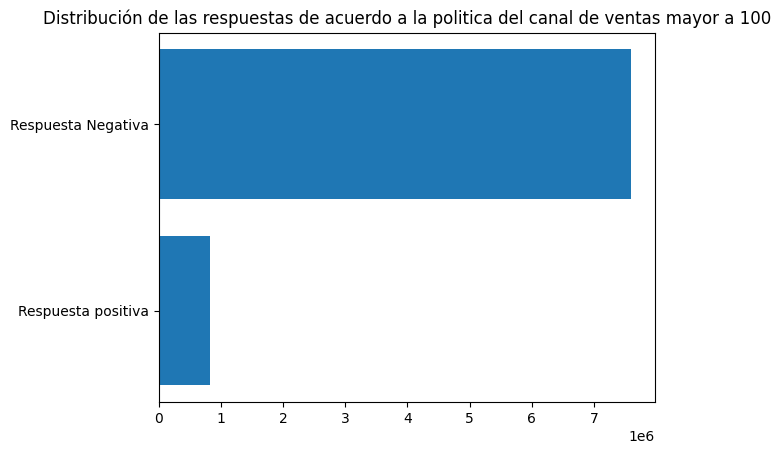

In [68]:
respuesta_positiva_canal_ventas_150 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Policy_Sales_Channel>100)].count()
respuesta_negativa_canal_ventas_150 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Policy_Sales_Channel>100)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_canal_ventas_150,respuesta_negativa_canal_ventas_150])
plt.title('Distribución de las respuestas de acuerdo a la politica del canal de ventas mayor a 100')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la politica del canal de ventas mayor a 100')

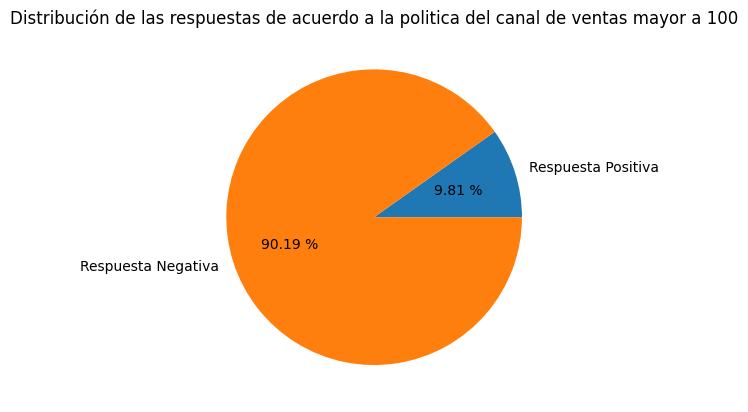

In [69]:
plt.pie([respuesta_positiva_canal_ventas_150, respuesta_negativa_canal_ventas_150], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la politica del canal de ventas mayor a 100')

#### Gráfica dependiendo de la antigüedad

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad menor a 50')

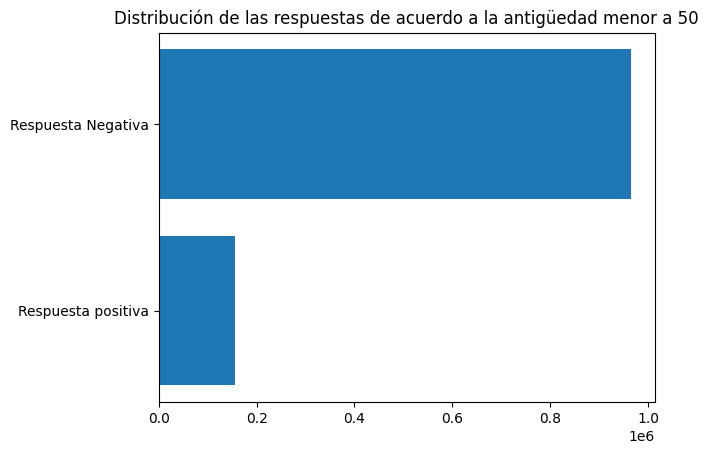

In [70]:
respuesta_positiva_antiguedad_50 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Vintage<=50)].count()
respuesta_negativa_antiguedad_50 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Vintage<=50)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_antiguedad_50,respuesta_negativa_antiguedad_50])
plt.title('Distribución de las respuestas de acuerdo a la antigüedad menor a 50')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad menor a 50')

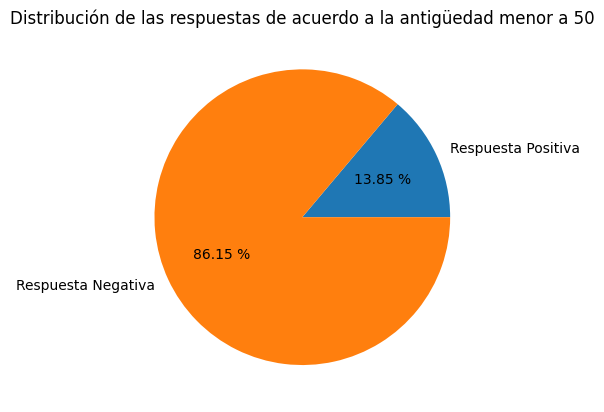

In [71]:
plt.pie([respuesta_positiva_antiguedad_50, respuesta_negativa_antiguedad_50], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la antigüedad menor a 50')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad mayor a 50 y menor a 100')

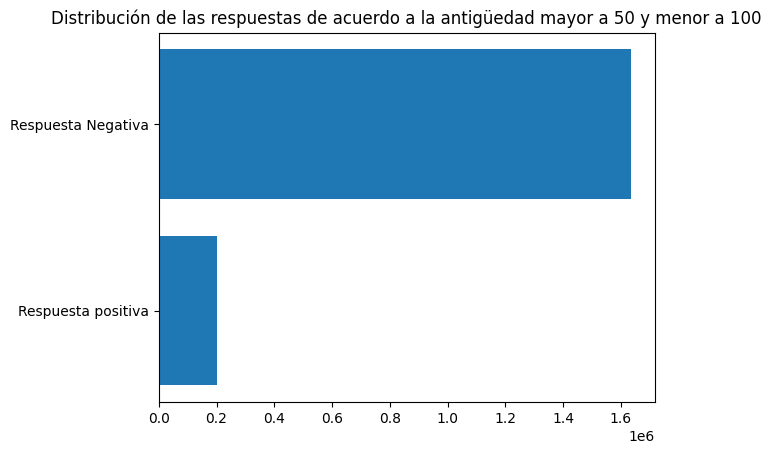

In [72]:
respuesta_positiva_antiguedad_100 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Vintage>50)&(datos_entrenamiento.Vintage<=100)].count()
respuesta_negativa_antiguedad_100 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Vintage>50)&(datos_entrenamiento.Vintage<=100)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_antiguedad_100,respuesta_negativa_antiguedad_100])
plt.title('Distribución de las respuestas de acuerdo a la antigüedad mayor a 50 y menor a 100')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad mayor a 50 y menor a 100')

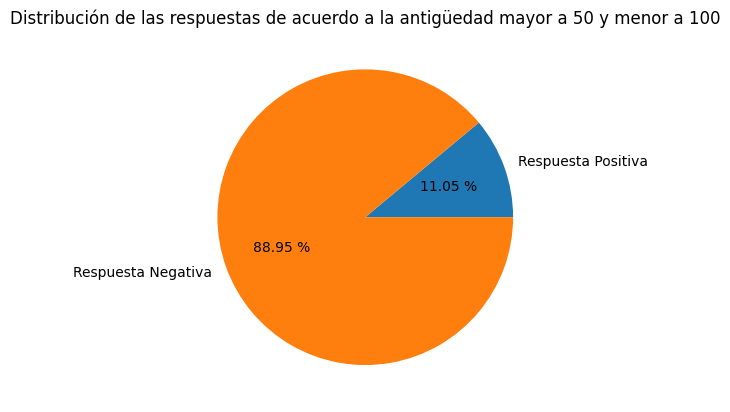

In [73]:
plt.pie([respuesta_positiva_antiguedad_100, respuesta_negativa_antiguedad_100], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la antigüedad mayor a 50 y menor a 100')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad mayor a 100 y menor a 150')

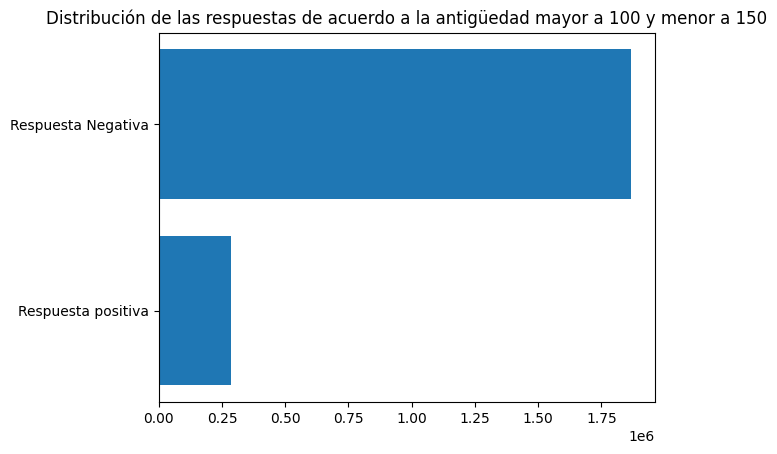

In [74]:
respuesta_positiva_antiguedad_150 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Vintage>100)&(datos_entrenamiento.Vintage<=150)].count()
respuesta_negativa_antiguedad_150 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Vintage>100)&(datos_entrenamiento.Vintage<=150)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_antiguedad_150,respuesta_negativa_antiguedad_150])
plt.title('Distribución de las respuestas de acuerdo a la antigüedad mayor a 100 y menor a 150')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad mayor a 100 y menor a 150')

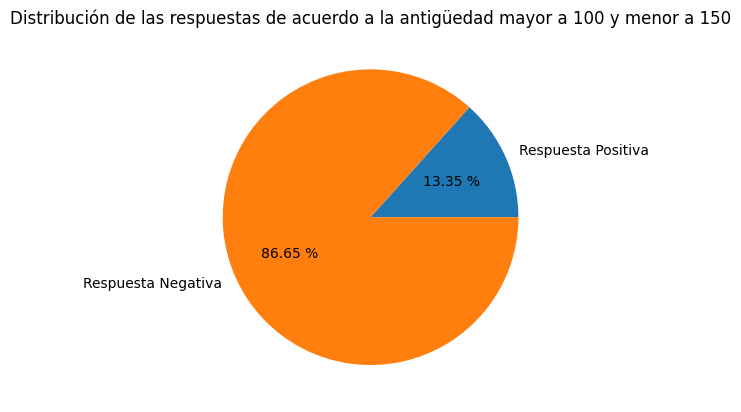

In [75]:
plt.pie([respuesta_positiva_antiguedad_150, respuesta_negativa_antiguedad_150], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la antigüedad mayor a 100 y menor a 150')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad mayor a 150 y menor a 200')

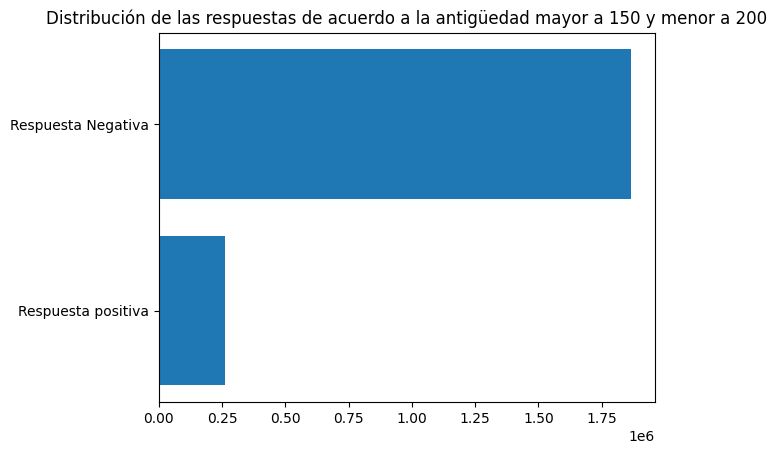

In [76]:
respuesta_positiva_antiguedad_200 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Vintage>150)&(datos_entrenamiento.Vintage<=200)].count()
respuesta_negativa_antiguedad_200 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Vintage>150)&(datos_entrenamiento.Vintage<=200)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_antiguedad_200,respuesta_negativa_antiguedad_200])
plt.title('Distribución de las respuestas de acuerdo a la antigüedad mayor a 150 y menor a 200')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad mayor a 150 y menor a 200')

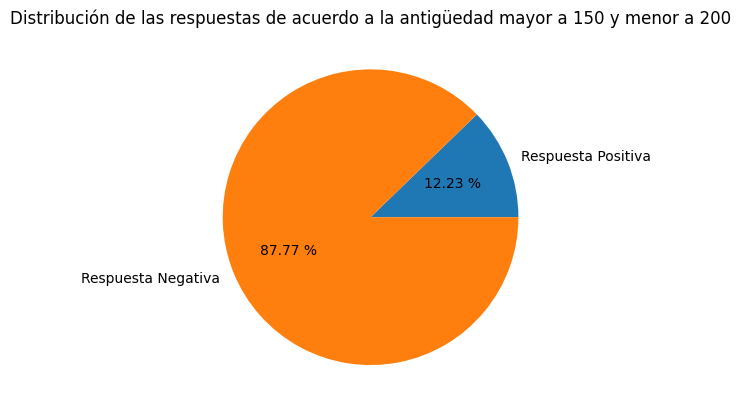

In [77]:
plt.pie([respuesta_positiva_antiguedad_200, respuesta_negativa_antiguedad_200], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la antigüedad mayor a 150 y menor a 200')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad mayor a 200 y menor a 250')

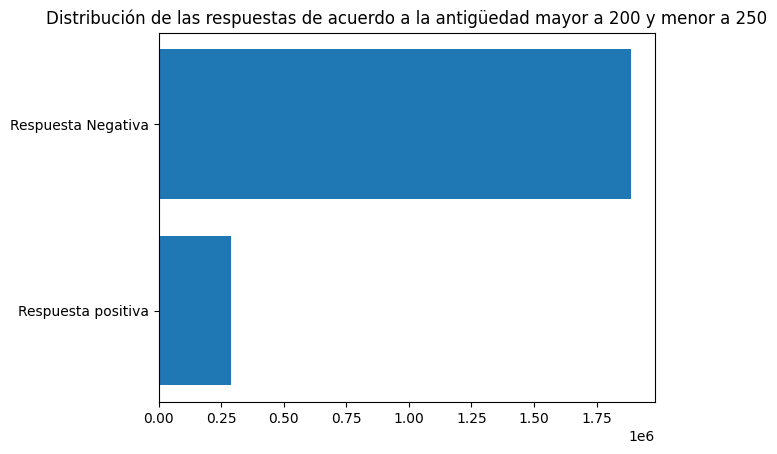

In [78]:
respuesta_positiva_antiguedad_250 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Vintage>200)&(datos_entrenamiento.Vintage<=250)].count()
respuesta_negativa_antiguedad_250 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Vintage>200)&(datos_entrenamiento.Vintage<=250)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_antiguedad_250,respuesta_negativa_antiguedad_250])
plt.title('Distribución de las respuestas de acuerdo a la antigüedad mayor a 200 y menor a 250')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad mayor a 200 y menor a 250')

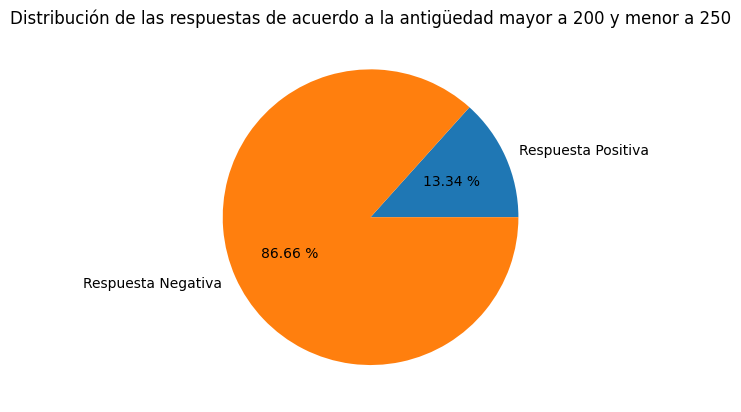

In [79]:
plt.pie([respuesta_positiva_antiguedad_250, respuesta_negativa_antiguedad_250], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la antigüedad mayor a 200 y menor a 250')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad mayor a 250 y menor a 300')

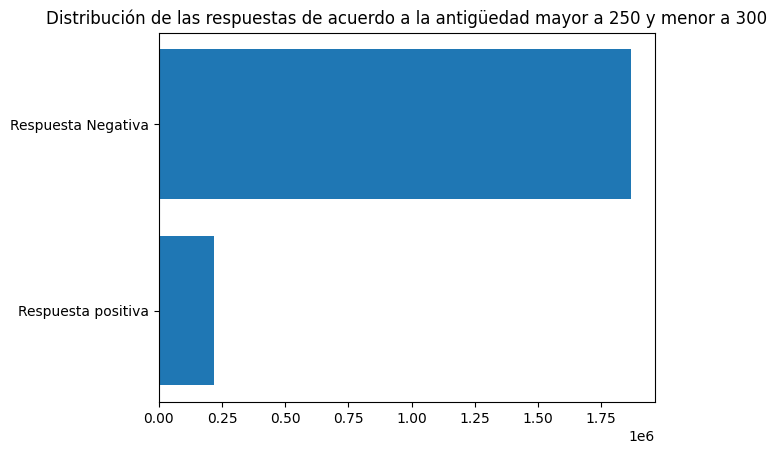

In [80]:
respuesta_positiva_antiguedad_300 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 1)&(datos_entrenamiento.Vintage>250)&(datos_entrenamiento.Vintage<=300)].count()
respuesta_negativa_antiguedad_300 = datos_entrenamiento.Response[(datos_entrenamiento.Response == 0)&(datos_entrenamiento.Vintage>250)&(datos_entrenamiento.Vintage<=300)].count()
plt.barh(['Respuesta positiva', 'Respuesta Negativa'], [respuesta_positiva_antiguedad_300,respuesta_negativa_antiguedad_300])
plt.title('Distribución de las respuestas de acuerdo a la antigüedad mayor a 250 y menor a 300')

Text(0.5, 1.0, 'Distribución de las respuestas de acuerdo a la antigüedad mayor a 250 y menor a 300')

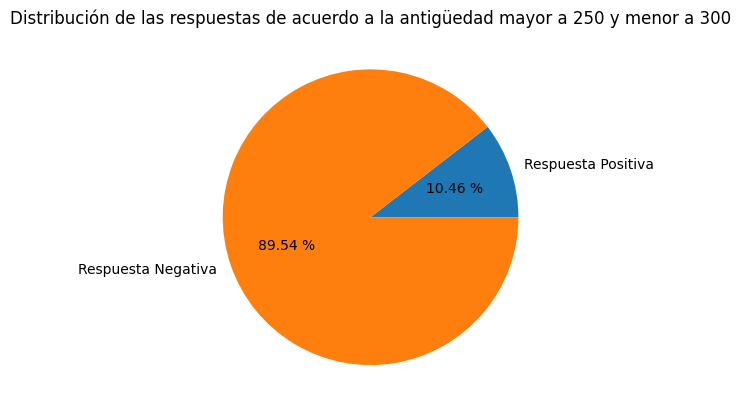

In [81]:
plt.pie([respuesta_positiva_antiguedad_300, respuesta_negativa_antiguedad_300], labels=['Respuesta Positiva', 'Respuesta Negativa'],autopct="%0.2f %%" )
plt.title('Distribución de las respuestas de acuerdo a la antigüedad mayor a 250 y menor a 300')

## Información acerca de las gráficas

En las diferentes gráficas anteriormente expuestas, se puede evidenciar que hay algunos parametros donde la información logra ser mas relevante respecto a la compra del seguro para autos, en cambio para otras columnas no lo es tanto, por lo tanto voy a proceder a mencionar las columnas de datos que dan datos relevantes, y luego aquellas donde los porcentajes son bastante similares, donde es muy probable que la información sea irrelevante, y donde posteriormente se eliminaran esas respectivas columnas

### Columnas con información relevante

Los siguientes son los porcentajes de afirmación:
* Mujer 10.33%
* Hombre 13.97%
* Edad < 35 años 5.84%
* Edad entre 35 y 64 años 19.75%
* Edad mayor a 65 años 8.04%
* Sin licencia 5.51 %
* Con licencia 12.31 %
* Region entre 0 y 10 9.15%
* Region entre 10 y 20 9.29%
* Region entre 20 y 30 16.51%
* Region entre 30 y 40 10.30%
* Region entre 40 y 50 9.41%
* Sin seguro 22.85%
* Con seguro 0.06%
* Vehiculo 0 4.14%
* Vehiculo 1 17.77%
* vehiculo 2 29.90%
* Vehiculo bueno 0.42%
* Vehiculo dañado 29.90%
* Antiguedad menor a 50 13.85%
* Antiguedad entre 50 y 100 11.05%
* Antiguedad entre 100 y 150 13.35%
* Antiguedad entre 150 y 200 12.23%
* Antiguedad entre 200 y 250 13.34%
* Antiguedad entre 250 y 300 10.46%
* Suscripción menor a 25mil 11.71%
* Sucripción entre 25mil y 50mil 12.07%
* Suscripción entre 50mil y 75mil 15.82%
* Suscripción mayor a 75 mil 14.45%
* Canal de ventas menor a 50 19.39% 
* Canal de ventas entre 50 y 100 12.61%
* Canal de ventas mayor a 100 9.81%


De acuerdo a está información, teniendo en cuenta los mayores porcentajes podemos deducir que aquellos que adquieren más seguros son hombres, entre la edad de 35 y 64 años, con licencia de conducción, una región entre 20 y 30, no tienen seguro, el vehiculo puede que sea del tipo 1 o del tipo 2, el vehiculo ha tenido algún daño, probablemente (pero no con mucha certeza si la antiguedad es relevante debido a la similitud entre los porcentajes) con una antiguedad menor a 250, una suscripción mayor a 50mil, y un canal de ventas menor a 50

### Columnas con información irrelevante

Dada la información anterior, es probable que la columna de antiguedad no proporcione datos significativos, dado que la mayoría se encuentran en un mismo rango de diferencia, uno respecto al otro, caso que no sucede con las demás columnas, por lo tanto se va a proceder a eliminar está columna

In [82]:
Columnas_a_eliminar_1 = ['Vintage']
datos_entrenamiento_1 = datos_entrenamiento.drop(Columnas_a_eliminar_1, axis=1)
datos_entrenamiento_1.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1,21,1,35.0,0,1,1,65101.0,124.0,0
1,1,43,1,28.0,0,2,1,58911.0,26.0,1
2,0,25,1,14.0,1,0,0,38043.0,152.0,0
3,0,35,1,1.0,0,1,1,2630.0,156.0,0
4,0,36,1,15.0,1,1,0,31951.0,152.0,0


In [83]:
Columnas_a_eliminar_2 = ['Vintage']
datos_prueba_2 = datos_prueba_1.drop(Columnas_a_eliminar_2, axis=1)
datos_prueba_2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
0,0,20,1,47.0,0,0,0,2630.0,160.0
1,1,47,1,28.0,0,1,1,37483.0,124.0
2,1,47,1,43.0,0,1,1,2630.0,26.0
3,0,22,1,47.0,1,0,0,24502.0,152.0
4,1,51,1,19.0,0,1,0,34115.0,124.0


Ahora vamos a ver la correlación existente entre cada una de las diferentes columnas

<Axes: >

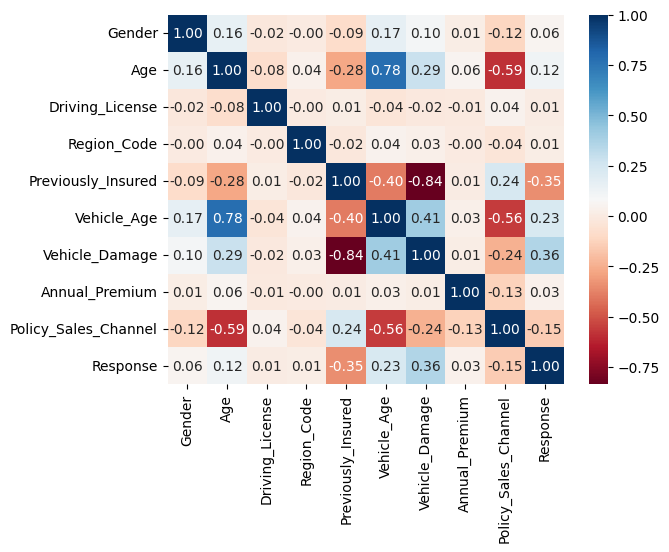

In [84]:
corr = datos_entrenamiento_1.corr()
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

Del mapa de calor podemos ver que existe una fuerte correlación inversa entre el daño del vehiculo y la aseguración previa, quizas porque si se asegura un vehiculo, podemos ser mas concientes en cuidarlo, generando está relación inversa, por otro lado, hay una correlación directa entre el año y el tipo de vehiculo de acuerdo al año, hay algunos otros valores que sobresalen, y otros tantos que no presentan relación alguna

## Verificación de datos vacios en las columnas

In [85]:
print(datos_entrenamiento_1['Gender'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_2['Gender'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [86]:
print(datos_entrenamiento_1['Age'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_2['Age'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [87]:
print(datos_entrenamiento_1['Driving_License'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_2['Driving_License'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [88]:
print(datos_entrenamiento_1['Region_Code'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_2['Region_Code'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [89]:
print(datos_entrenamiento_1['Previously_Insured'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_2['Previously_Insured'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [90]:
print(datos_entrenamiento_1['Vehicle_Age'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_2['Vehicle_Age'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [91]:
print(datos_entrenamiento_1['Vehicle_Damage'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_2['Vehicle_Damage'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [92]:
print(datos_entrenamiento_1['Annual_Premium'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_2['Annual_Premium'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [93]:
print(datos_entrenamiento_1['Policy_Sales_Channel'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(datos_prueba_2['Policy_Sales_Channel'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [94]:
print(datos_entrenamiento_1['Response'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento

0


Todos los datos están completos, por lo tanto el siguiente paso será empezar a realizar las diferentes predicciones con los algoritmos de Machine Learning

# Predicciones con diferentes algoritmos de Machine Learning

In [95]:
Y_entrenamiento = datos_entrenamiento_1.loc[:, 'Response']
X_entrenamiento = datos_entrenamiento_1.drop(['Response'], axis=1)

In [96]:
#Dividimos los datos para poder entrenar los datos con el conjunto de entrenamiento,
#Y realizar una predicción sobre el mismo
x_train, x_test, y_train, y_test = train_test_split(X_entrenamiento, Y_entrenamiento, test_size=0.3)

## Logistic Regression

In [97]:
primer_clasificador = linear_model.LogisticRegression(solver='liblinear')
primer_clasificador.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [98]:
prediction = primer_clasificador.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [99]:
print(primer_clasificador.score(x_test, y_test))

0.876850242217741


## Decision Tree Classifier

In [100]:
segundo_clasificador = DecisionTreeClassifier(max_depth=4)

In [101]:
segundo_clasificador.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [102]:
print(segundo_clasificador.score(x_test, y_test))

0.876850242217741


[Text(0.5, 0.9, 'x[6] <= 0.5\ngini = 0.216\nsamples = 8053358\nvalue = [7063343, 990015]'),
 Text(0.25, 0.7, 'x[4] <= 0.5\ngini = 0.008\nsamples = 4004849\nvalue = [3988104, 16745]'),
 Text(0.125, 0.5, 'x[8] <= 152.5\ngini = 0.064\nsamples = 471800\nvalue = [456149, 15651]'),
 Text(0.0625, 0.3, 'x[1] <= 60.5\ngini = 0.051\nsamples = 392621\nvalue = [382320, 10301]'),
 Text(0.03125, 0.1, 'gini = 0.055\nsamples = 353839\nvalue = [343906, 9933]'),
 Text(0.09375, 0.1, 'gini = 0.019\nsamples = 38782\nvalue = [38414, 368]'),
 Text(0.1875, 0.3, 'x[8] <= 158.5\ngini = 0.126\nsamples = 79179\nvalue = [73829, 5350]'),
 Text(0.15625, 0.1, 'gini = 0.188\nsamples = 40930\nvalue = [36642, 4288]'),
 Text(0.21875, 0.1, 'gini = 0.054\nsamples = 38249\nvalue = [37187, 1062]'),
 Text(0.375, 0.5, 'x[8] <= 153.5\ngini = 0.001\nsamples = 3533049\nvalue = [3531955, 1094]'),
 Text(0.3125, 0.3, 'x[8] <= 2.0\ngini = 0.0\nsamples = 3268793\nvalue = [3267994, 799]'),
 Text(0.28125, 0.1, 'gini = 0.011\nsamples = 4

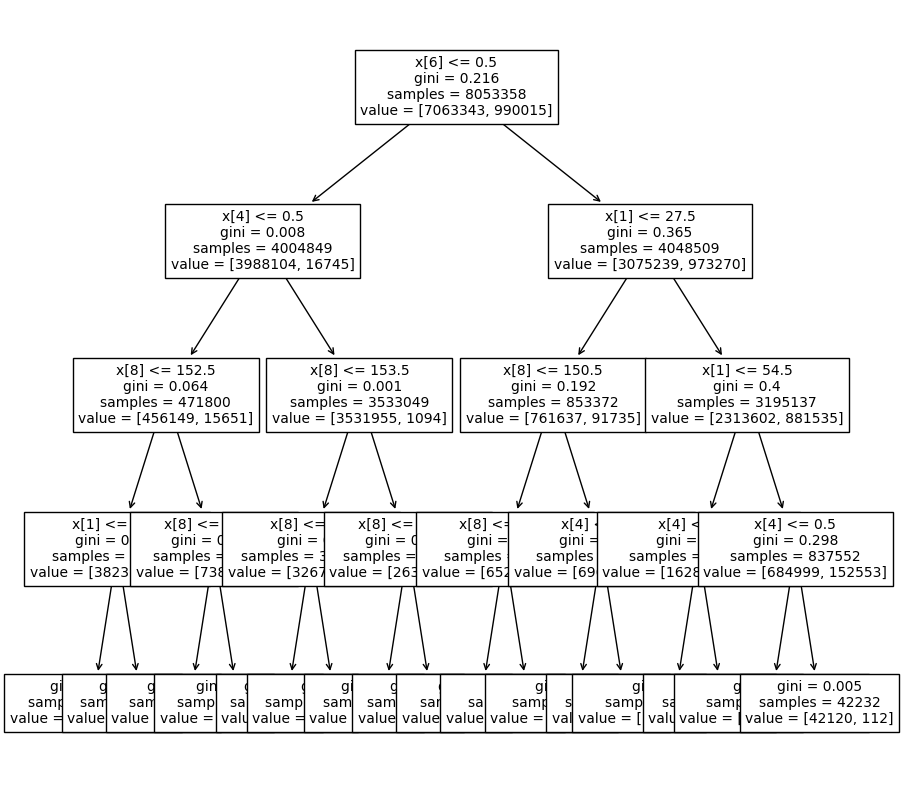

In [103]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(segundo_clasificador, fontsize = 10)

## SVM

In [104]:
#tercer_clasificador = SVC(random_state=101)

In [105]:
#tercer_clasificador.fit(x_train, y_train)

In [106]:
#print(tercer_clasificador.score(x_test, y_test))

De acuerdo a lo investigado, SVM, necesita muchos recursos para que se pueda realizar una predicción en un tiempo determinado, por lo tanto no lo uso en este proyecto

## KNeighborClassifier

In [107]:
#cuarto_clasificador = KNeighborsClassifier(n_neighbors=5)

In [108]:
#cuarto_clasificador.fit(x_train, y_train)

In [109]:
#print(cuarto_clasificador.score(x_test, y_test))

De acuerdo a lo investigado, KNeighborsClassifier, necesita muchos recursos para que se pueda realizar una predicción en un tiempo determinado, por lo tanto no lo uso en este proyecto

## MultinomialNB

In [110]:
#quinto_clasificador = MultinomialNB(alpha=0.01, fit_prior=True)

In [111]:
#quinto_clasificador.fit(x_train, y_train)

In [112]:
#print(quinto_clasificador.score(x_test, y_test))

De acuerdo a lo investigado, MultinomialNB, necesita muchos recursos para que se pueda realizar una predicción en un tiempo determinado, por lo tanto no lo uso en este proyecto

## Mejor resultado del Notebook

In [113]:
Y_prediccion=segundo_clasificador.predict(datos_prueba_2)

In [114]:
ejemplo = pd.read_csv("/kaggle/input/playground-series-s4e7/sample_submission.csv")

In [115]:
ejemplo.head()

,id,Response
0,11504798,0.5
1,11504799,0.5
2,11504800,0.5
3,11504801,0.5
4,11504802,0.5


In [116]:
df_prediccion = datos_prueba.assign(Response=Y_prediccion)
df_prediccion.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228,0
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123,0
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271,0
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115,0
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148,0


In [117]:
Columnas_a_eliminar = ['Gender','Age','Driving_License', 'Region_Code', 'Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel','Vintage']
Submission = df_prediccion.drop(Columnas_a_eliminar, axis=1)
Submission.head()

,id,Response
0,11504798,0
1,11504799,0
2,11504800,0
3,11504801,0
4,11504802,0


# Hacer archivo csv correcto

In [118]:
Submission.to_csv('Prediction_.csv', index=False)

# Curva ROC, para los datos, en base a los datos de entrenamiento

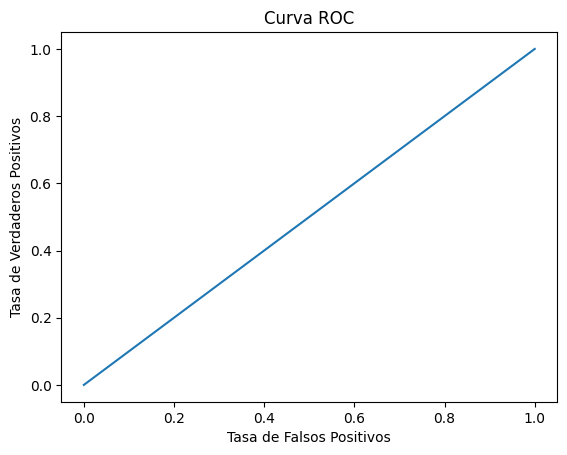

In [119]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Suponiendo que ya tiene un modelo entrenado y las predicciones de probabilidad
y_true = y_test  # Etiquetas reales
y_pred = segundo_clasificador.predict(x_test)  # Predicciones de probabilidad

# Calcular las tasas de falsos positivos y verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Crear la curva ROC
plt.plot(fpr, tpr)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.show()



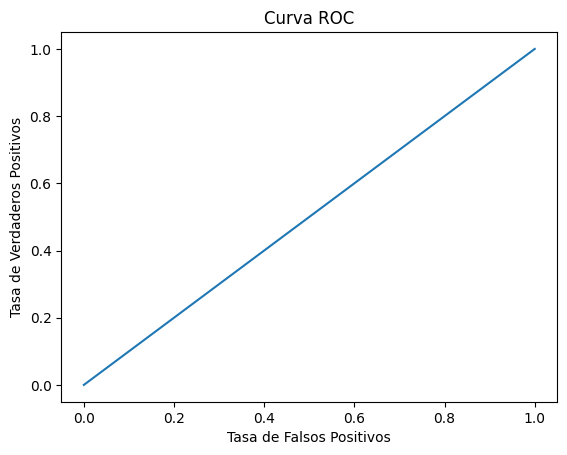

In [120]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Suponiendo que ya tiene un modelo entrenado y las predicciones de probabilidad
y_true = y_test  # Etiquetas reales
y_pred = primer_clasificador.predict(x_test)  # Predicciones de probabilidad

# Calcular las tasas de falsos positivos y verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Crear la curva ROC
plt.plot(fpr, tpr)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.show()

De acuerdo a esto, se hace necesario mejorar la calidad de los datos en base a la validación cruzada, ensemble learning o regularización, y si se puede implementar redes neuronales, sería bueno tambien

# Validación cruzada para mejorar los resultados de los dos algoritmos más optimos

# Curva ROC, para los datos, en base a los datos de entrenamiento, con validación cruzada

In [121]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Suponiendo que ya tiene un modelo entrenado y las predicciones de probabilidad
#y_true = y_test  # Etiquetas reales
#y_pred = ...  # Predicciones de probabilidad

# Calcular las tasas de falsos positivos y verdaderos positivos
#fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Crear la curva ROC
#plt.plot(fpr, tpr)
#plt.xlabel("Tasa de Falsos Positivos")
#plt.ylabel("Tasa de Verdaderos Positivos")
#plt.title("Curva ROC")
#plt.show()

# Ensemble Learning

# Curva ROC, para los datos, en base a los datos de entrenamiento, con Ensemble Learning

In [122]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Suponiendo que ya tiene un modelo entrenado y las predicciones de probabilidad
#y_true = y_test  # Etiquetas reales
#y_pred = ...  # Predicciones de probabilidad

# Calcular las tasas de falsos positivos y verdaderos positivos
#fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Crear la curva ROC
#plt.plot(fpr, tpr)
#plt.xlabel("Tasa de Falsos Positivos")
#plt.ylabel("Tasa de Verdaderos Positivos")
#plt.title("Curva ROC")
#plt.show()

# Regularización

# Curva ROC, para los datos, en base a los datos de entrenamiento, con regularización

In [123]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Suponiendo que ya tiene un modelo entrenado y las predicciones de probabilidad
#y_true = y_test  # Etiquetas reales
#y_pred = ...  # Predicciones de probabilidad

# Calcular las tasas de falsos positivos y verdaderos positivos
#fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Crear la curva ROC
#plt.plot(fpr, tpr)
#plt.xlabel("Tasa de Falsos Positivos")
#plt.ylabel("Tasa de Verdaderos Positivos")
#plt.title("Curva ROC")
#plt.show()